In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns


In [3]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})
jz

title  zone
0                                    Chief Executives     5
1                       Chief Sustainability Officers     5
2                     General and Operations Managers     4
3                                         Legislators     4
4                 Advertising and Promotions Managers     4
..                                                ...   ...
918  Gas Compressor and Gas Pumping Station Operators     2
919           Pump Operators, Except Wellhead Pumpers     2
920                                  Wellhead Pumpers     2
921         Refuse and Recyclable Material Collectors     2
922                 Tank Car, Truck, and Ship Loaders     2

[923 rows x 2 columns]

In [4]:
# Set folder path
folder_name = "results/jm"

# Get all JSON files
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]

#get the model name. stop at the second underscore
model_name = [json_files[:-5] for json_files in json_files]


In [18]:
model_name

['deepseek_benchmark',
 'deepseek_persona',
 'llama3.2_benchmark',
 'llama3.2_persona',
 'mistral_benchmark',
 'mistral_persona']

In [6]:
def mean_perfect_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["perfect_match"].mean().to_numpy()

def mean_related_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["related"].mean().to_numpy()

In [14]:
perfect_array_list = []
related_array_list = []

# Loop through each JSON file and load it into the DataFrame
for json_file in json_files:
    df = pd.read_json(f"{folder_name}/{json_file}").dropna()
    #drop the iteration column'
    df = df.drop(labels=['rating'], axis=1)
    #normalize related score to 0-1
    df['related'] = df['related']
    #get the mean difference in df, by iteration, into a np array
    perfect_array = mean_perfect_array(df)
    related_array = mean_related_array(df)
    perfect_array_list.append(perfect_array)
    related_array_list.append(related_array)

print(perfect_array_list)
print(related_array_list)

[array([0.13043478, 0.08695652, 0.15217391, 0.08695652, 0.06521739,
       0.13043478, 0.19565217, 0.13043478, 0.23913043, 0.13043478]), array([0.26086957, 0.2173913 , 0.23913043, 0.19565217, 0.2173913 ,
       0.26086957, 0.17391304, 0.2173913 , 0.17391304, 0.30434783]), array([0.17391304, 0.19565217, 0.2173913 , 0.15217391, 0.2173913 ,
       0.15217391, 0.2173913 , 0.13043478, 0.23913043, 0.2173913 ]), array([0.23913043, 0.19565217, 0.26086957, 0.2173913 , 0.2173913 ,
       0.2826087 , 0.2173913 , 0.26086957, 0.26086957, 0.2173913 ]), array([0.06521739, 0.06521739, 0.13043478, 0.10869565, 0.17391304,
       0.13043478, 0.10869565, 0.13043478, 0.10869565, 0.10869565]), array([0.13043478, 0.13043478, 0.19565217, 0.13043478, 0.15217391,
       0.15217391, 0.17391304, 0.13043478, 0.10869565, 0.10869565])]
[array([0.54347826, 0.67391304, 0.56521739, 0.47826087, 0.34782609,
       0.54347826, 0.63043478, 0.56521739, 1.        , 0.52173913]), array([1.56521739, 1.36956522, 1.34782609, 1.4

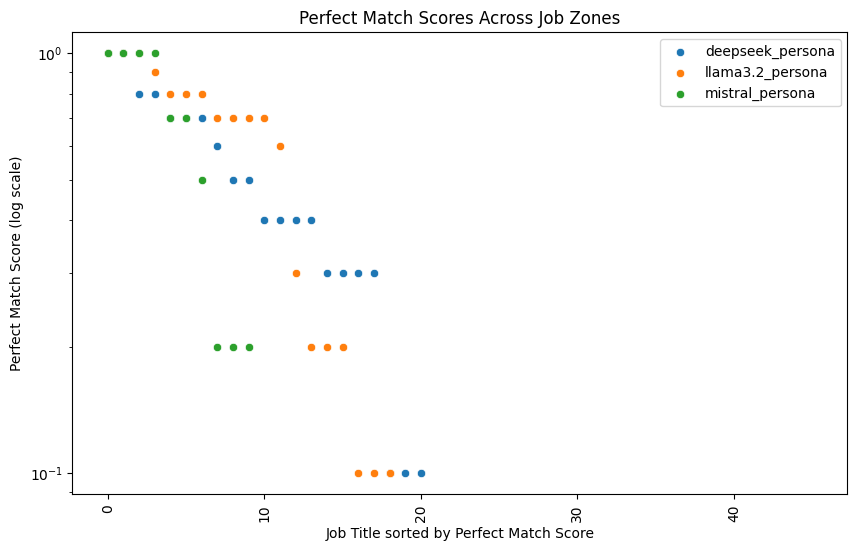

In [45]:
df1 = pd.read_json(os.path.join(folder_name, json_files[1]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[3]), lines=False).dropna()
df3 = pd.read_json(os.path.join(folder_name, json_files[5]), lines=False).dropna()

df1 = df1.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()
df2 = df2.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()
df3 = df3.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()

df_merged = pd.concat([df1, df2], ignore_index=True)
df_merged = pd.concat([df_merged, df3], ignore_index=True)
#merge with jz
df_merged = df_merged.merge(jz, how='left', left_on='title', right_on='title')
df1.sort_values(by='perfect_match', ascending=False, inplace=True)
df2.sort_values(by='perfect_match', ascending=False, inplace=True)
df3.sort_values(by='perfect_match', ascending=False, inplace=True)
# Create a scatter plot with different colors for each zone


# df_merged['zone_color'] = df_merged['zone'].apply(lambda x: 'red' if x == 5 else ('blue' if x == 1 else 'lightgrey'))
df1['index'] = np.arange(len(df1))
df2['index'] = np.arange(len(df2))
df3['index'] = np.arange(len(df3))

#scatter plot in log scale for y axis
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.title('Perfect Match Scores Across Job Zones')
plt.xlabel('Job Title sorted by Perfect Match Score')
plt.ylabel('Perfect Match Score (log scale)')
plt.xticks(rotation=90)
sns.scatterplot(data=df1, x='index', y=df1["perfect_match"], label=model_name[1])
sns.scatterplot(data=df2, x='index', y=df2["perfect_match"], label=model_name[3])
sns.scatterplot(data=df3, x='index', y=df3["perfect_match"], label=model_name[5])
plt.legend()

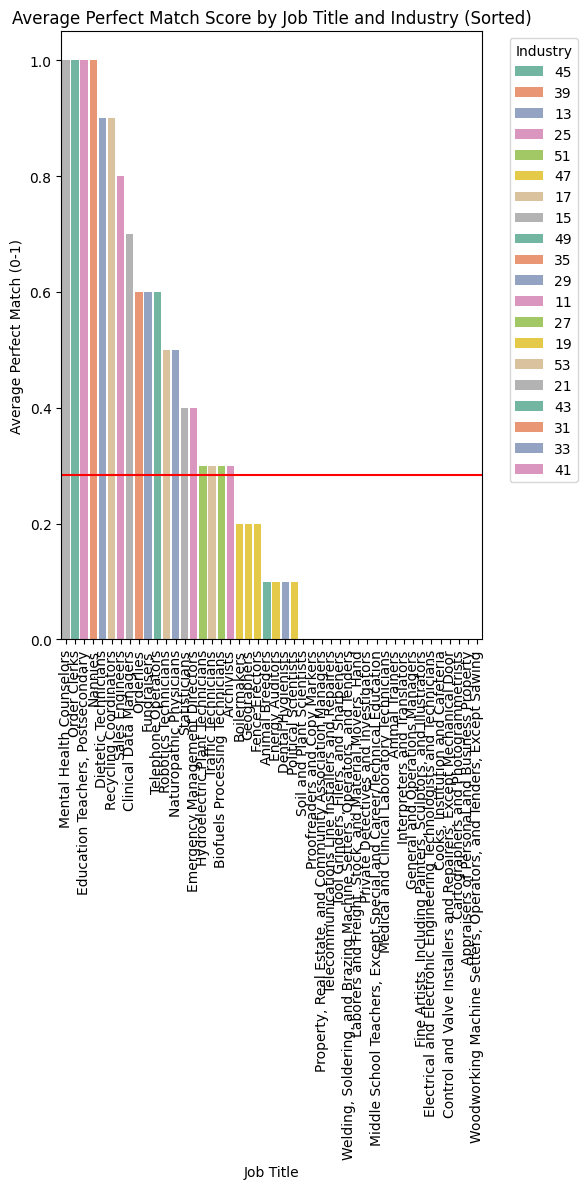

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame (e.g., no_prompt_df)
df["ind"] = df["ind"].astype(str)
df["zone"] = df["zone"].astype(str)

# Calculate mean perfect_match per title to determine sort order
order = df.groupby("title")["perfect_match"].mean().sort_values(ascending=False).index

# Create figure
plt.figure(figsize=(6, 12))

# Bar plot: mean perfect_match by title, colored by ind, sorted descending
sns.barplot(data=df, x="title", y="perfect_match", hue="ind", palette="Set2", order=order)
#add a mean score
plt.axhline(y= df["perfect_match"].sum() / len(df), color='r', linestyle='-')

# Customize
plt.xticks(rotation=90)
plt.title('Average Perfect Match Score by Job Title and Industry (Sorted)')
plt.xlabel('Job Title')
plt.ylabel('Average Perfect Match (0-1)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

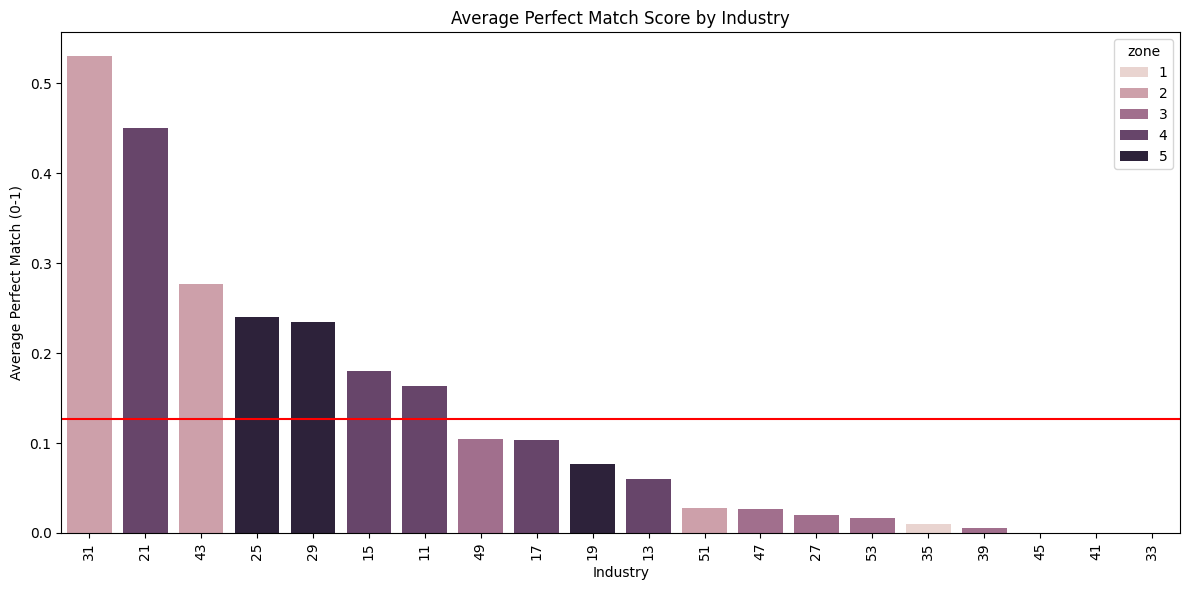

In [22]:
ind_plot = df[["ind", "perfect_match", "related", "zone"]].groupby("ind").agg({"perfect_match":"mean", "related":"mean", "zone":"first"}).reset_index()

# plot perfect match by industry
plt.figure(figsize=(12, 6))
# sns.barplot(data=ind_plot, x="ind", y="perfect_match", order=ind_plot.sort_values("perfect_match", ascending=False)["ind"], hue="zone")
sns.barplot(data=ind_plot, x="ind", y="related", order=ind_plot.sort_values("related", ascending=False)["ind"], hue="zone")
# add a mean score line
plt.axhline(y= ind_plot["related"].mean(), color='r', linestyle='-')
plt.xticks(rotation=90)
plt.title('Average Perfect Match Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Perfect Match (0-1)')
plt.tight_layout()
plt.show()


In [23]:
zone_plot = df[["zone", "perfect_match", "related"]].groupby("zone").agg({"perfect_match":"mean", "related":"mean"}).reset_index()
#sort by perfect match
# zone_plot = zone_plot.sort_values("perfect_match", ascending=False)
zone_plot = zone_plot.sort_values("related", ascending=False)

zone_plot

zone  perfect_match   related
4     5       0.357143  0.198571
3     4       0.220000  0.151333
2     3       0.100000  0.089000
1     2       0.181818  0.086364
0     1       0.000000  0.006667

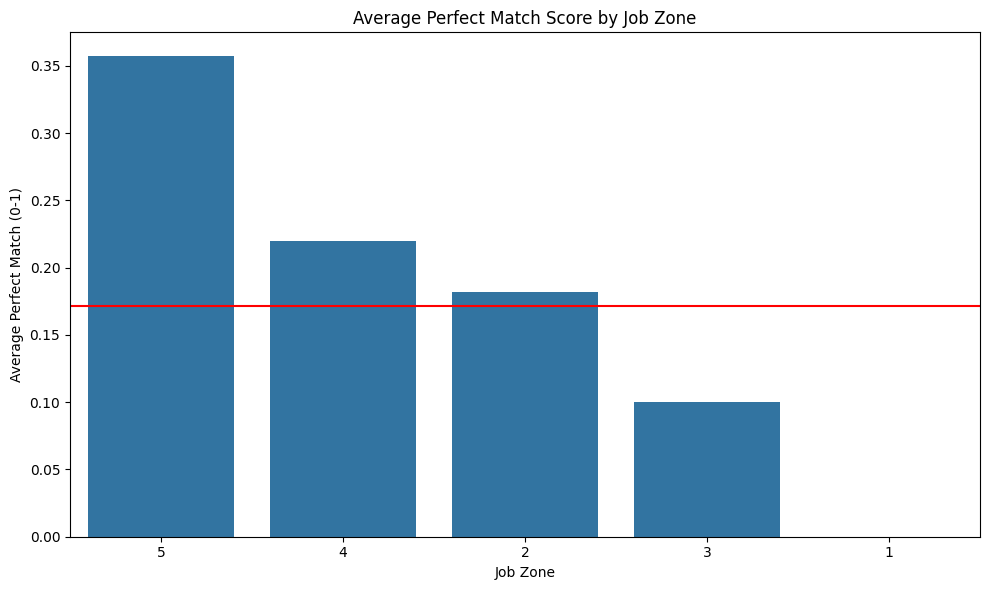

In [24]:
# plot perfect match by zone
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_plot, x="zone", y="perfect_match", order=zone_plot.sort_values("perfect_match", ascending=False)["zone"])
#add a mean score line
plt.axhline(y= zone_plot["perfect_match"].mean(), color='r', linestyle='-')
plt.title('Average Perfect Match Score by Job Zone')
plt.xlabel('Job Zone')
plt.ylabel('Average Perfect Match (0-1)')
plt.tight_layout()
plt.show()


In [25]:
# plot the match score by job zone
sns.boxplot(x='zone', y='perfect_match', data=x)
plt.title('Perfect Match Score by Job Zone')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'int'>.

In [1]:
import pandas as pd
import os
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz['industry'] = jz['o*net-soc_code'].str[:2]
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})

full_df = pd.DataFrame()
folder_name = "results/jm1"
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
for file in json_files:
    df = pd.read_json(f"{folder_name}/{file}").dropna()
    #group by title, and agg all the columns start with c_ and r_ by mean
    df = df.groupby("title").agg(lambda x: x.mean() if x.name.startswith(("c_", "r_")) else x.tolist()).reset_index()
    # Rename the columns from r_precision to hits
    df = df.rename(columns={"r_best_fit_precision": "r_best_fit_hits", 
                                  "r_best_and_great_fit_precision": "r_best_and_great_fit_hits", 
                                  "r_all_fit_precision": "r_all_fit_hits"})
    df["model"] = file[:-15]
    full_df = pd.concat([full_df, df], ignore_index=True)

full_df = full_df.merge(jz, how="left", left_on="title", right_on="title")
full_df = full_df.drop(columns=["best_fit","great_fit", "all_fit", "good_fit"])
full_df

title  c_best_fit_hits  \
0    Art, Drama, and Music Teachers, Postsecondary              0.0   
1                      Bill and Account Collectors              0.0   
2                       Billing and Posting Clerks              0.0   
3                        Bioinformatics Scientists              0.0   
4                   Business Intelligence Analysts              0.0   
..                                             ...              ...   
271                     Sustainability Specialists              0.0   
272                               Talent Directors              1.0   
273                                Team Assemblers              0.8   
274         Timing Device Assemblers and Adjusters              0.0   
275            Web and Digital Interface Designers              0.0   

     c_best_fit_precision  r_best_fit_hits  r_best_fit_recall  \
0                0.000000              0.8               0.10   
1                0.000000              0.0               0.00   
2                0.000000              0.4               0.13   
3                0.000000              0.1               0.02   
4                0.000000              0.1               0.02   
..                    ...              ...                ...   
271              0.000000              0.3               0.05   
272              0.098322              0.8               0.12   
273              0.003747              0.6               0.14   
274              0.000000              0.0               0.00   
275              0.000000              0.0               0.00   

     c_best_and_great_fit_hits  c_best_and_great_fit_precision  \
0                          0.0                        0.000000   
1                          0.0                        0.000000   
2                          0.0                        0.000000   
3                          0.0                        0.000000   
4                          0.0                        0.000000   
..                         ...                             ...   
271                        0.0                        0.000000   
272                        1.0                        0.029224   
273                        1.0                        0.002851   
274                        0.0                        0.000000   
275                        0.0                        0.000000   

     r_best_and_great_fit_hits  r_best_and_great_fit_recall  c_all_fit_hits  \
0                          0.8                         0.16             0.0   
1                          0.2                         0.02             0.0   
2                          0.7                         0.26             0.0   
3                          0.1                         0.03             0.0   
4                          0.1                         0.02             0.0   
..                         ...                          ...             ...   
271                        0.4                         0.09             0.0   
272                        1.0                         0.19             1.0   
273                        0.8                         0.23             1.0   
274                        0.4                         0.07             0.0   
275                        0.0                         0.00             0.0   

     c_all_fit_precision  r_all_fit_hits  r_all_fit_recall  \
0               0.000000             1.0              0.39   
1               0.000000             0.5              0.06   
2               0.000000             0.8              0.27   
3               0.000000             0.1              0.03   
4               0.000000             0.1              0.02   
..                   ...             ...               ...   
271             0.000000             0.4              0.09   
272             0.018099             1.0              0.23   
273             0.002748             0.8              0.23   
274             0.000000             0.4         

In [83]:
import pandas as pd
import os
import numpy as np
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz['industry'] = jz['o*net-soc_code'].str[:2]
jz = jz.drop(labels=['date', 'domain_source'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone', 'o*net-soc_code':'code'})

full_df = pd.DataFrame()
folder_name = "results/jm1"
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
for file in json_files:
    df = pd.read_json(f"{folder_name}/{file}").dropna()
    # Rename the columns from r_precision to hits
    df = df.rename(columns={"r_best_fit_precision": "r_best_fit_hits", 
                                  "r_best_and_great_fit_precision": "r_best_and_great_fit_hits", 
                                  "r_all_fit_precision": "r_all_fit_hits"})
    df["model"] = file[:-15]
    full_df = pd.concat([full_df, df], ignore_index=True)

full_df = full_df.merge(jz, how="left", left_on="title", right_on="title")
full_df = full_df.drop(columns=["best_fit","great_fit", "all_fit", "good_fit"])

test = full_df[["title", "c_all_fit_hits", "c_all_fit_precision", "r_all_fit_hits", "r_all_fit_recall", "model", "zone", "industry", "code"]]
#split the model by "_"
test["setup"] = test["model"].str.split("_").str[1]
test["model"] = test["model"].str.split("_").str[0]  # get the model name
# rename the columns

# both deepseek benchmark and persona

# Assign trial numbers in a repeating sequence
test["trial"] = np.tile(np.repeat(np.arange(1, 11), 46), 6)
test = test.rename(columns={"c_all_fit_hits": "correct_job_hitrate",
                          "c_all_fit_precision": "correct_job_precision",
                          "r_all_fit_hits": "related_job_hitrate",
                          "r_all_fit_recall": "related_job_recall"})

test


C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\2611091057.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["setup"] = test["model"].str.split("_").str[1]
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\2611091057.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["model"] = test["model"].str.split("_").str[0]  # get the model name
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\2611091057.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

title  correct_job_hitrate  \
0     Property, Real Estate, and Community Associati...                    0   
1                       General and Operations Managers                    0   
2                        Emergency Management Directors                    1   
3                            Sustainability Specialists                    0   
4                        Project Management Specialists                    0   
...                                                 ...                  ...   
2755                   Patternmakers, Metal and Plastic                    0   
2756  Extruding and Drawing Machine Setters, Operato...                    0   
2757                                  Commercial Pilots                    0   
2758                                 Parking Attendants                    0   
2759                     Subway and Streetcar Operators                    0   

      correct_job_precision  related_job_hitrate  related_job_recall  \
0                  0.000000                    1                 0.5   
1                  0.000000                    1                 0.6   
2                  0.008696                    1                 0.3   
3                  0.000000                    0                 0.0   
4                  0.000000                    1                 0.1   
...                     ...                  ...                 ...   
2755               0.000000                    0                 0.0   
2756               0.000000                    0                 0.0   
2757               0.000000                    0                 0.0   
2758               0.000000                    0                 0.0   
2759               0.000000                    0                 0.0   

         model  zone industry        code      setup  trial  
0     deepseek     4       11  11-9141.00  benchmark      1  
1     deepseek     4       11  11-1021.00  benchmark      1  
2     deepseek     4       11  11-9161.00  benchmark      1  
3     deepseek     4       13  13-1199.05  benchmark      1  
4     deepseek     4       13  13-1082.00  benchmark      1  
...        ...   ...      ...         ...        ...    ...  
2755   mistral     3       51  51-4062.00    persona     10  
2756   mistral     2       51  51-4021.00    persona     10  
2757   mistral     3       53  53-2012.00    persona     10  
2758   mistral     2       53  53-6021.00    persona     10  
2759   mistral     2       53  53-4041.00    persona     10  

[2760 rows x 11 columns]

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # Import statsmodels.api as sm
from statsmodels.genmod.families import Binomial, Gamma


# Function to run GLM for a model
def analyze_model(model_name, metric, family):
    df_model = test[test["model"] == model_name]
    if isinstance(family, Binomial):
        formula = f"{metric} ~ setup"
        # Add interaction terms for setup with title, zone, and industry

        model = sm.GLM.from_formula(formula, data=df_model, family=family).fit()
    else:  # Gamma
        df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros
        formula = f"{metric}_adj ~ setup"
        model = sm.GLM.from_formula(formula, data=df_model, family=family).fit()
    return model

# Define families with link functions
binomial_family = sm.families.Binomial()  # Default logit link
gamma_family = sm.families.Gamma(link=sm.families.links.log())  # Instantiate the log link

# Analyze each model
models = ["deepseek", "llama3.2", "mistral"]
metrics = ["correct_job_hitrate", "related_job_hitrate", "correct_job_precision", "related_job_recall"]
families = [binomial_family, binomial_family, gamma_family, gamma_family]

for model_name in models:
    print(f"\n{model_name.upper()} Analysis:")
    for metric, family in zip(metrics, families):
        model = analyze_model(model_name, metric, family)
        print(f"{metric}:")
        print(model.summary().tables[1])  # Coefficients table


DEEPSEEK Analysis:
correct_job_hitrate:
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.8593      0.137    -13.618      0.000      -2.127      -1.592
setup[T.persona]     0.6288      0.176      3.567      0.000       0.283       0.974
related_job_hitrate:
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4510      0.096     -4.716      0.000      -0.638      -0.264
setup[T.persona]     0.8564      0.135      6.348      0.000       0.592       1.121
correct_job_precision:
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.0935      0.079    -77.161      0.000     

c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\1979101507.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\1979101507.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [13]:
test

title  correct_job_hitrate  \
0     Property, Real Estate, and Community Associati...                    0   
1                       General and Operations Managers                    0   
2                        Emergency Management Directors                    1   
3                            Sustainability Specialists                    0   
4                        Project Management Specialists                    0   
...                                                 ...                  ...   
2755                   Patternmakers, Metal and Plastic                    0   
2756  Extruding and Drawing Machine Setters, Operato...                    0   
2757                                  Commercial Pilots                    0   
2758                                 Parking Attendants                    0   
2759                     Subway and Streetcar Operators                    0   

      correct_job_precision  related_job_hitrate  related_job_recall  \
0                  0.000000                    1                 0.5   
1                  0.000000                    1                 0.6   
2                  0.008696                    1                 0.3   
3                  0.000000                    0                 0.0   
4                  0.000000                    1                 0.1   
...                     ...                  ...                 ...   
2755               0.000000                    0                 0.0   
2756               0.000000                    0                 0.0   
2757               0.000000                    0                 0.0   
2758               0.000000                    0                 0.0   
2759               0.000000                    0                 0.0   

         model  zone industry      setup  trial  
0     deepseek     4       11  benchmark      1  
1     deepseek     4       11  benchmark      1  
2     deepseek     4       11  benchmark      1  
3     deepseek     4       13  benchmark      1  
4     deepseek     4       13  benchmark      1  
...        ...   ...      ...        ...    ...  
2755   mistral     3       51    persona     10  
2756   mistral     2       51    persona     10  
2757   mistral     3       53    persona     10  
2758   mistral     2       53    persona     10  
2759   mistral     2       53    persona     10  

[2760 rows x 10 columns]

In [14]:
test_dis = test.groupby(["title", "model", "setup"]).agg(lambda x: x.mean() if x.name.startswith(("c", "r")) else x.iloc[0]).reset_index()
test_dis.drop(columns=["trial"], inplace=True)
test_dis

title     model      setup  \
0    Art, Drama, and Music Teachers, Postsecondary  deepseek  benchmark   
1    Art, Drama, and Music Teachers, Postsecondary  deepseek    persona   
2    Art, Drama, and Music Teachers, Postsecondary  llama3.2  benchmark   
3    Art, Drama, and Music Teachers, Postsecondary  llama3.2    persona   
4    Art, Drama, and Music Teachers, Postsecondary   mistral  benchmark   
..                                             ...       ...        ...   
271            Web and Digital Interface Designers  deepseek    persona   
272            Web and Digital Interface Designers  llama3.2  benchmark   
273            Web and Digital Interface Designers  llama3.2    persona   
274            Web and Digital Interface Designers   mistral  benchmark   
275            Web and Digital Interface Designers   mistral    persona   

     correct_job_hitrate  correct_job_precision  related_job_hitrate  \
0                    0.0                    0.0                  1.0   
1                    0.0                    0.0                  1.0   
2                    0.0                    0.0                  1.0   
3                    0.0                    0.0                  1.0   
4                    0.0                    0.0                  1.0   
..                   ...                    ...                  ...   
271                  0.0                    0.0                  0.1   
272                  0.0                    0.0                  0.4   
273                  0.0                    0.0                  0.5   
274                  0.0                    0.0                  0.2   
275                  0.0                    0.0                  0.0   

     related_job_recall  zone industry  
0                  0.39     5       25  
1                  0.40     5       25  
2                  0.44     5       25  
3                  0.40     5       25  
4                  0.40     5       25  
..                  ...   ...      ...  
271                0.02     4       15  
272                0.09     4       15  
273                0.17     4       15  
274                0.03     4       15  
275                0.00     4       15  

[276 rows x 9 columns]

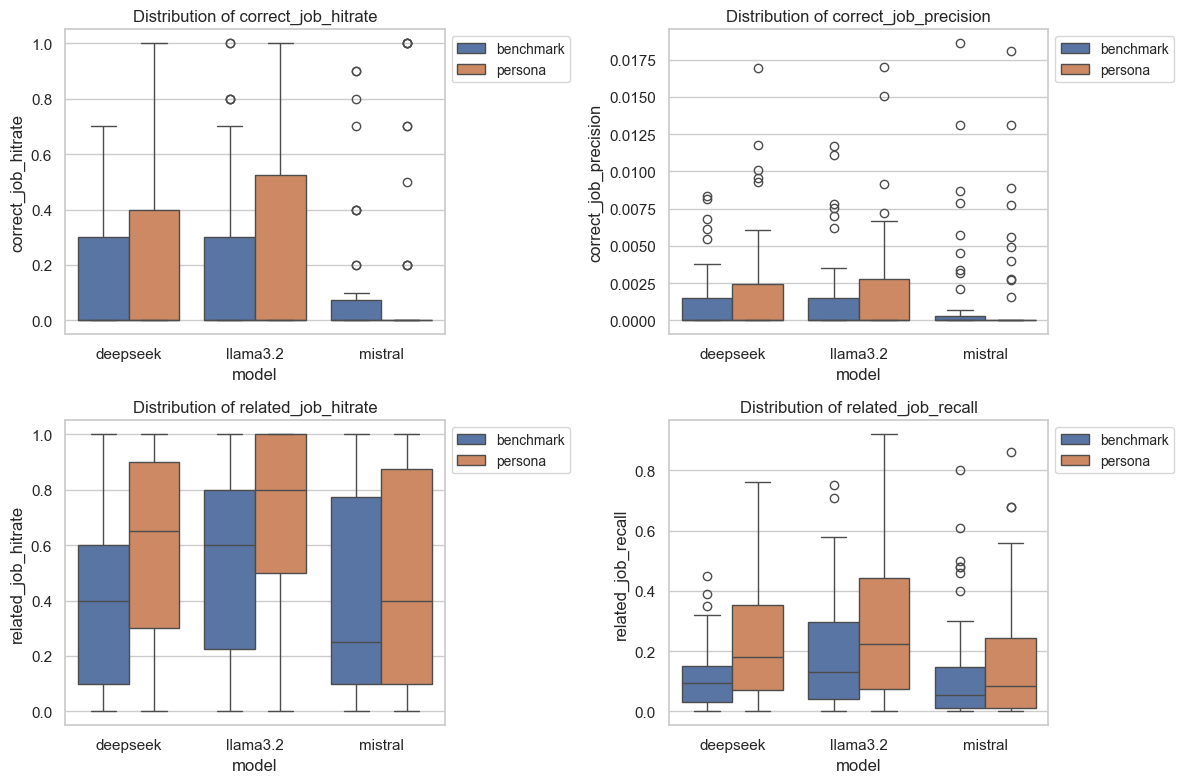

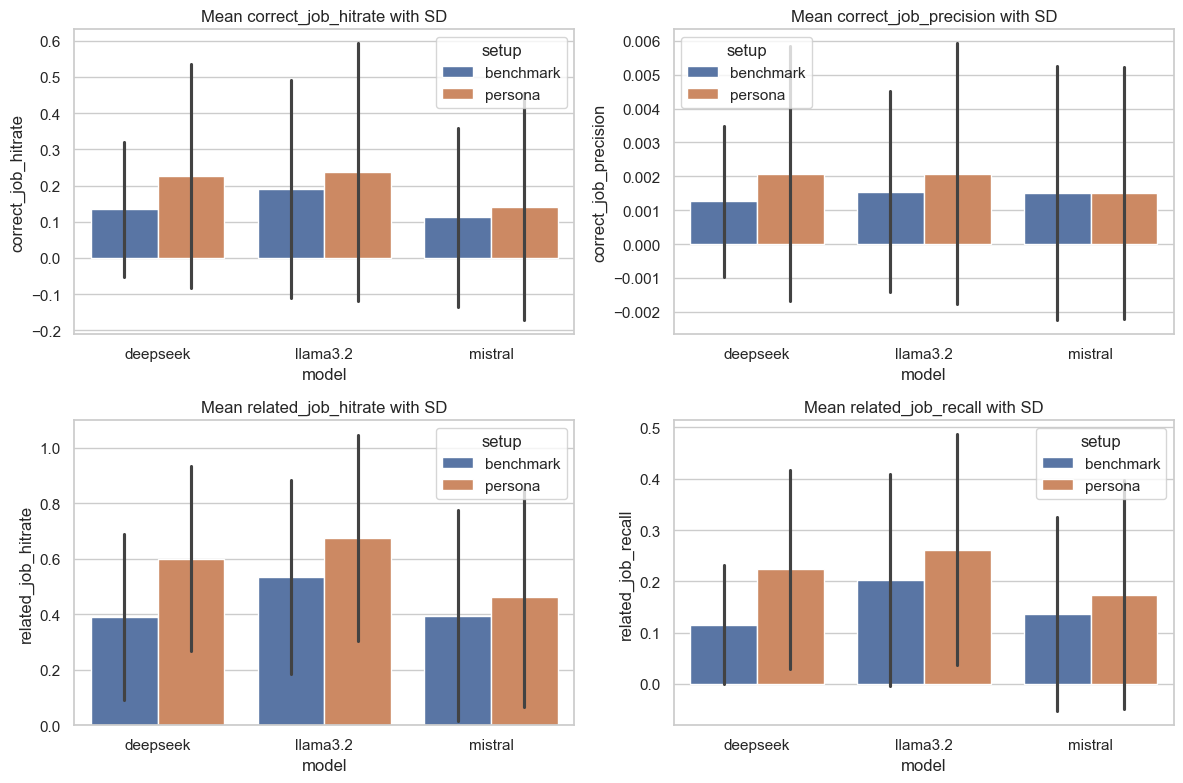

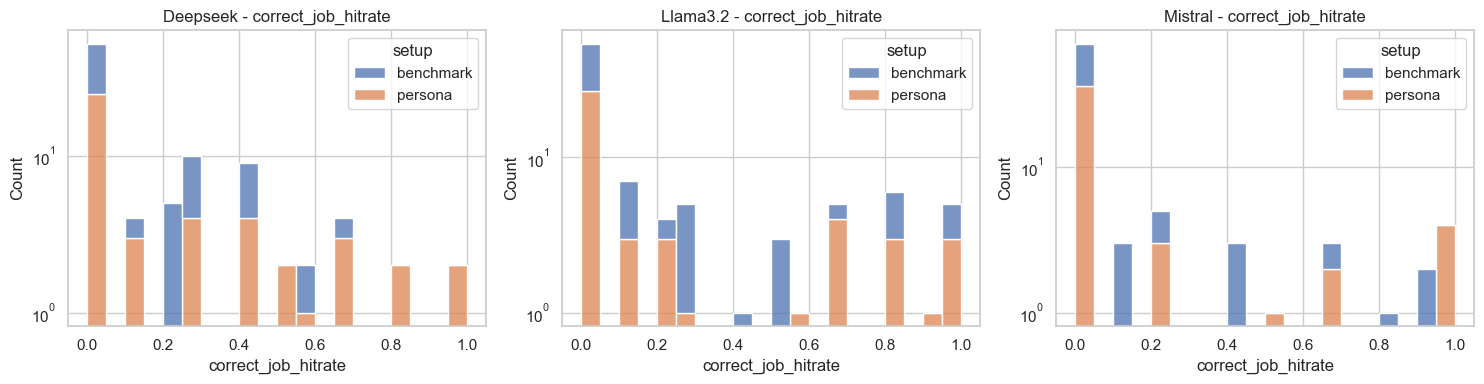

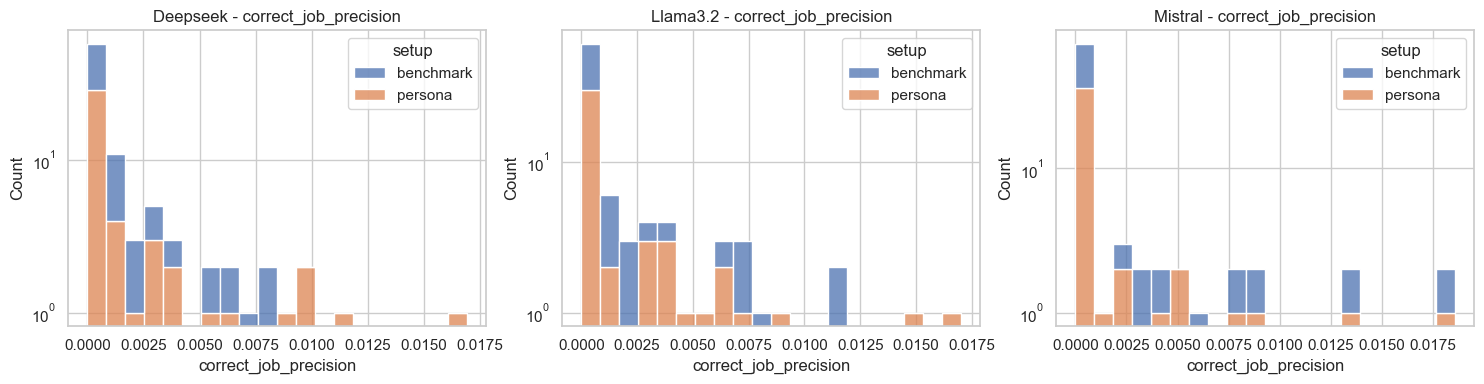

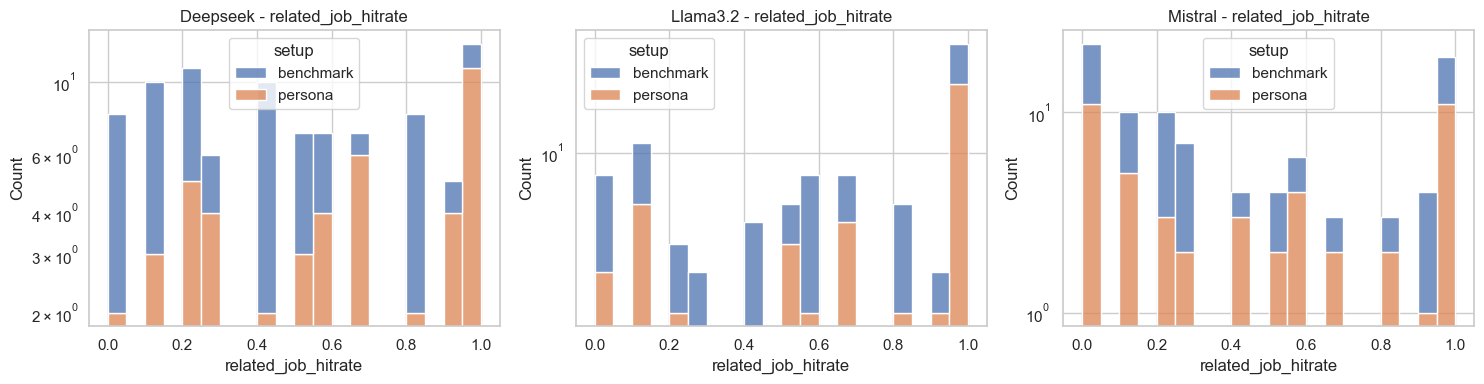

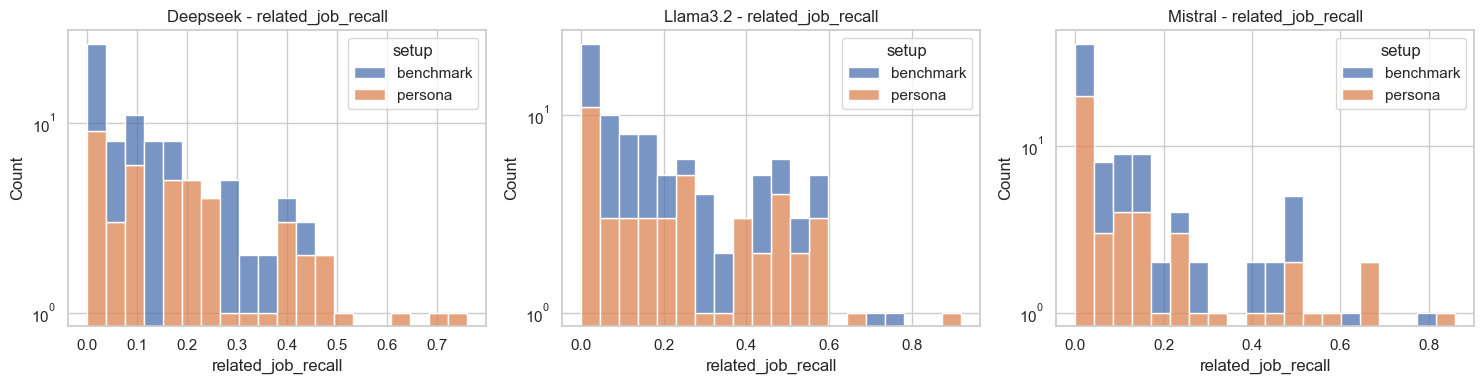

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
metrics = ["correct_job_hitrate","correct_job_precision","related_job_hitrate", "related_job_recall"]
# Set figure size
# 1. Box Plots
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="model", y=metric, hue="setup", data=test_dis)
    plt.title(f"Distribution of {metric}")
    plt.xticks()
    plt.legend(title="", bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')  # Adjust legend size
plt.tight_layout()
plt.show()

# 2. Bar Plots (Means with Error Bars)
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x="model", y=metric, hue="setup", data=test_dis, errorbar="sd")
    plt.title(f"Mean {metric} with SD")
    plt.xticks()
plt.tight_layout()
plt.show()

# 3. Histograms per Model
for metric in metrics:
    plt.figure(figsize=(15, 4))
    for i, model in enumerate(["deepseek", "llama3.2", "mistral"], 1):
        plt.subplot(1, 3, i)
        sns.histplot(data=test_dis[test_dis["model"] == model], x=metric, hue="setup", multiple="stack", bins=20)
        plt.yscale("log")
        plt.title(f"{model.capitalize()} - {metric}")
    plt.tight_layout()
    plt.show()

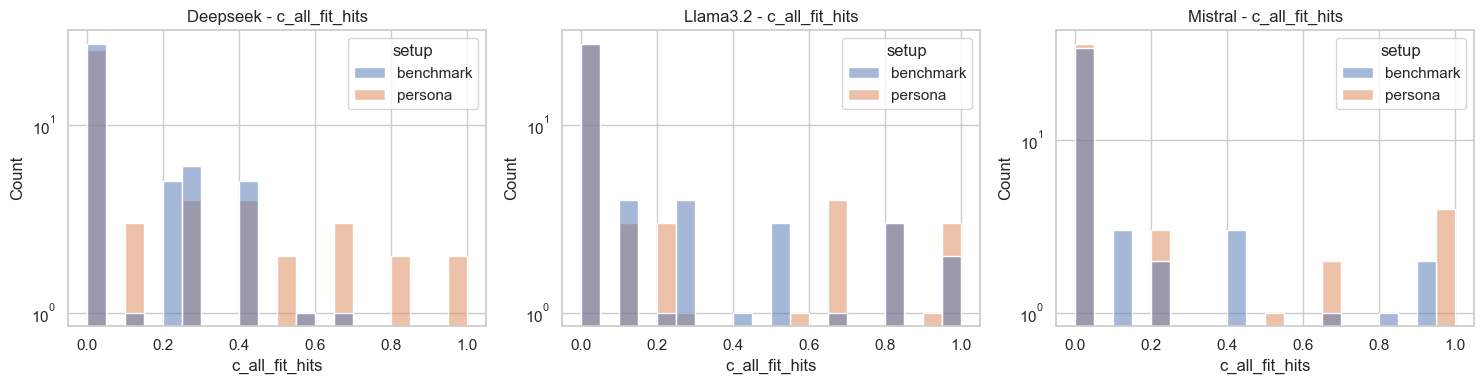

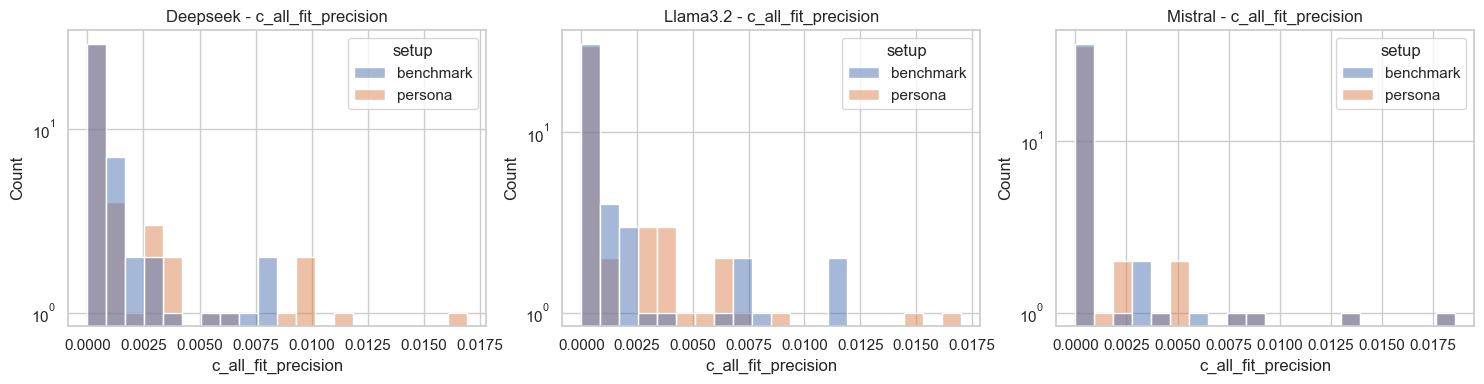

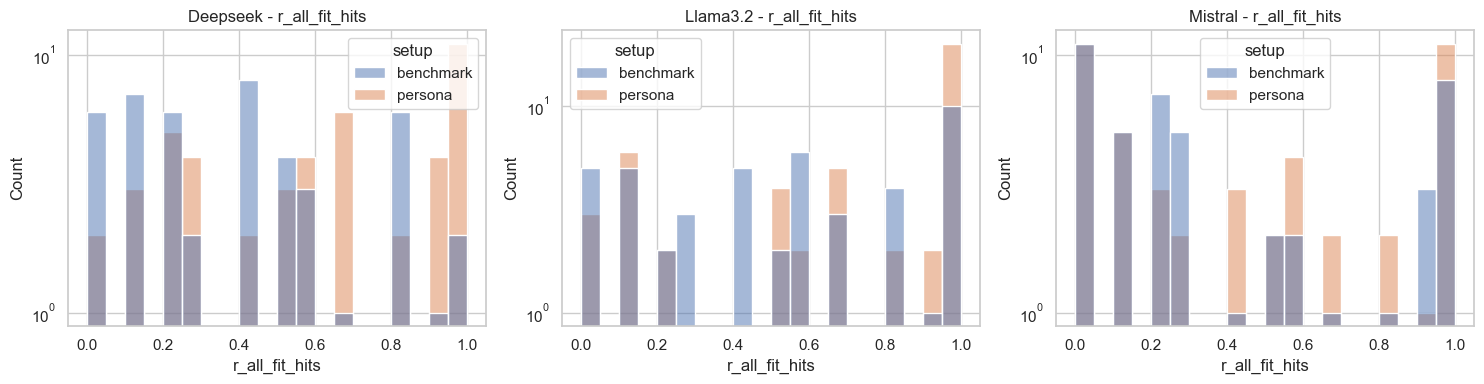

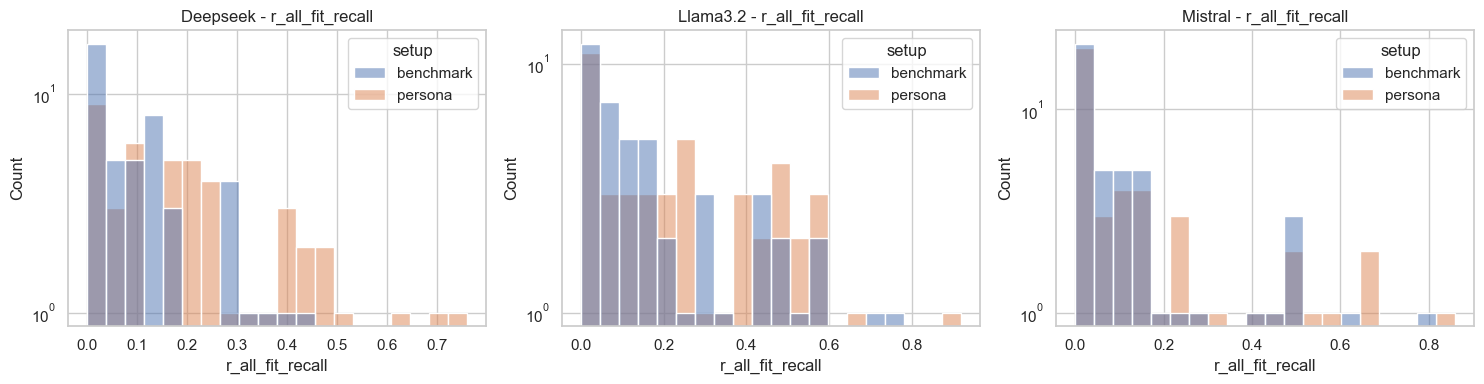

In [10]:
# 3. Histograms per Model
for metric in ["c_all_fit_hits", "c_all_fit_precision", "r_all_fit_hits", "r_all_fit_recall"]:
    plt.figure(figsize=(15, 4))
    for i, model in enumerate(["deepseek", "llama3.2", "mistral"], 1):
        plt.subplot(1, 3, i)
        sns.histplot(data=test_dis[test_dis["model"] == model], x=metric, hue="setup", bins=20, alpha=0.5)
        plt.yscale("log")
        plt.title(f"{model.capitalize()} - {metric}")
    plt.tight_layout()
    plt.show()

NameError: name 'x' is not defined

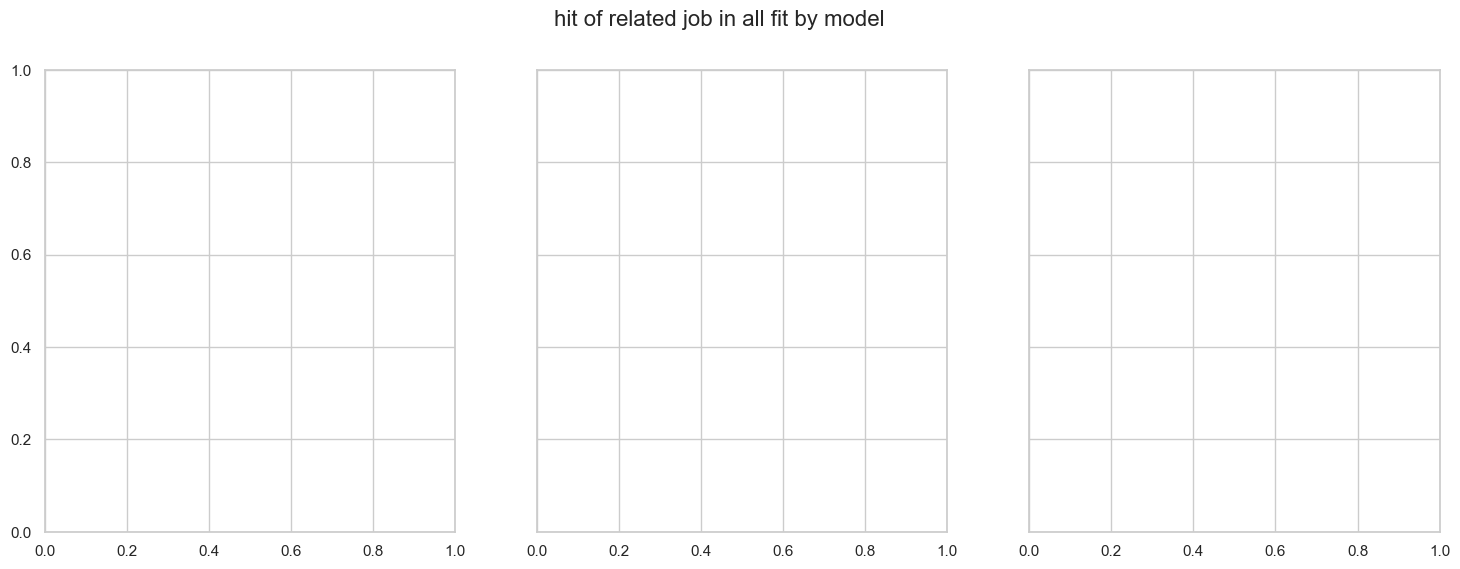

In [11]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("hit of related job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["r_all_fit_hits"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["r_all_fit_hits"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Related Hits")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["r_all_fit_hits"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["r_all_fit_hits"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["r_all_fit_hits"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["r_all_fit_hits"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



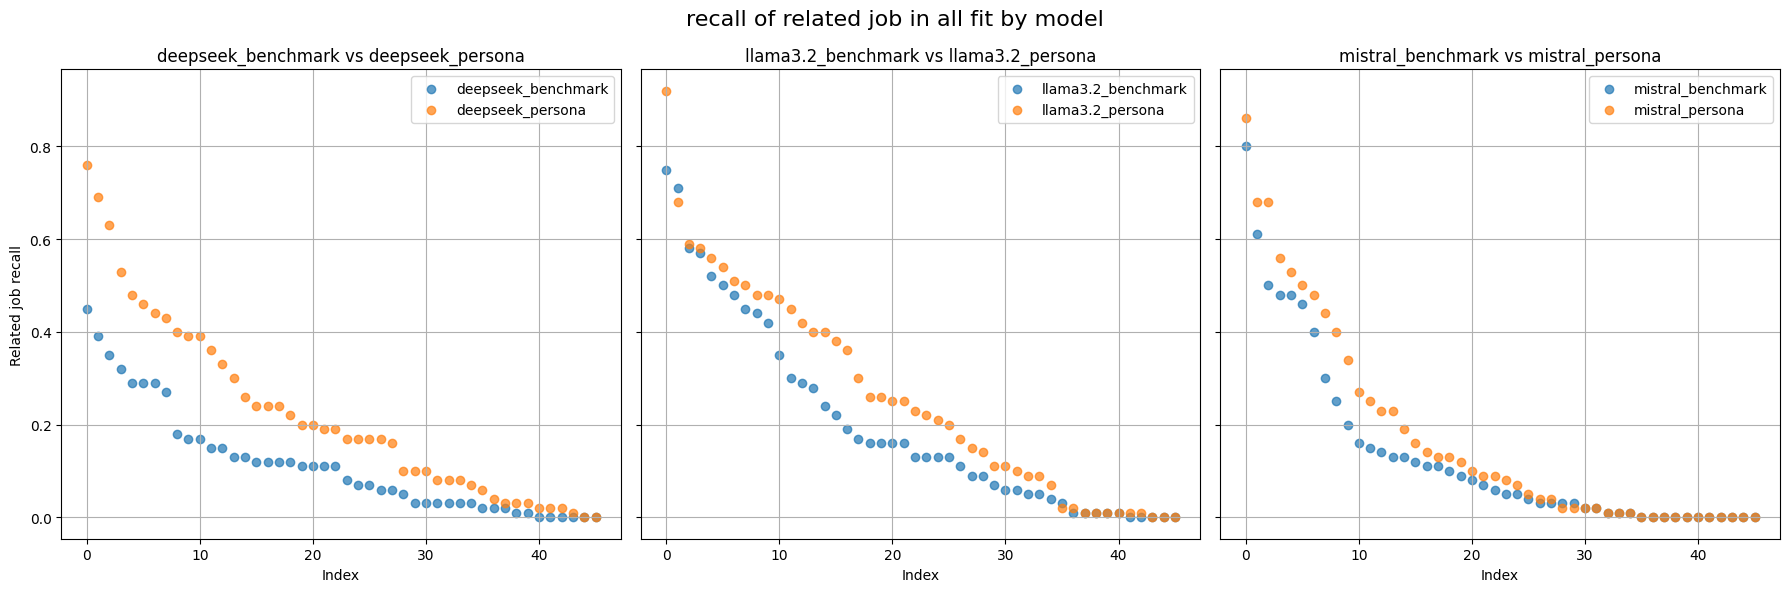

In [20]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("recall of related job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["r_all_fit_recall"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["r_all_fit_recall"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Related job recall")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["r_all_fit_recall"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["r_all_fit_recall"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["r_all_fit_recall"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["r_all_fit_recall"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



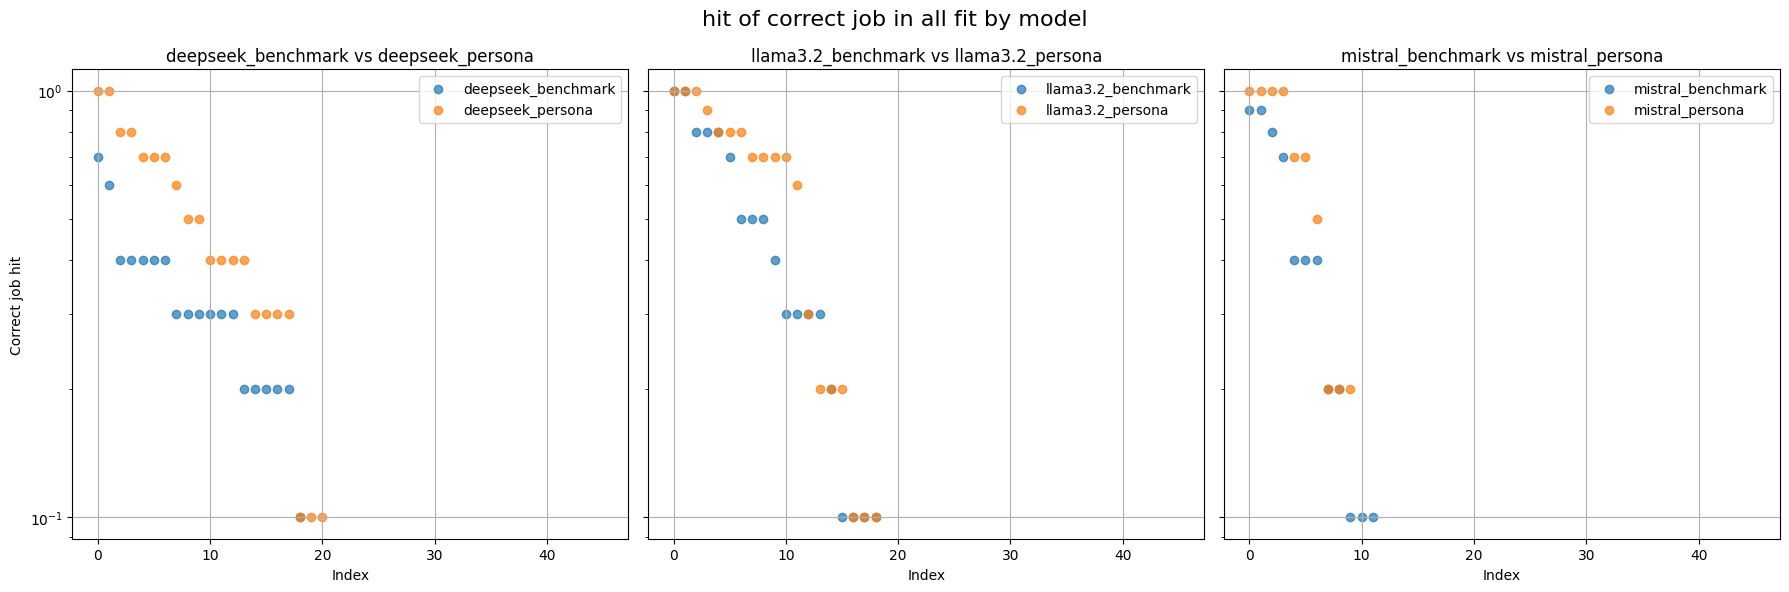

In [27]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("hit of correct job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_hits"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["c_all_fit_hits"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job hit")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_hits"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_hits"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_hits"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_hits"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



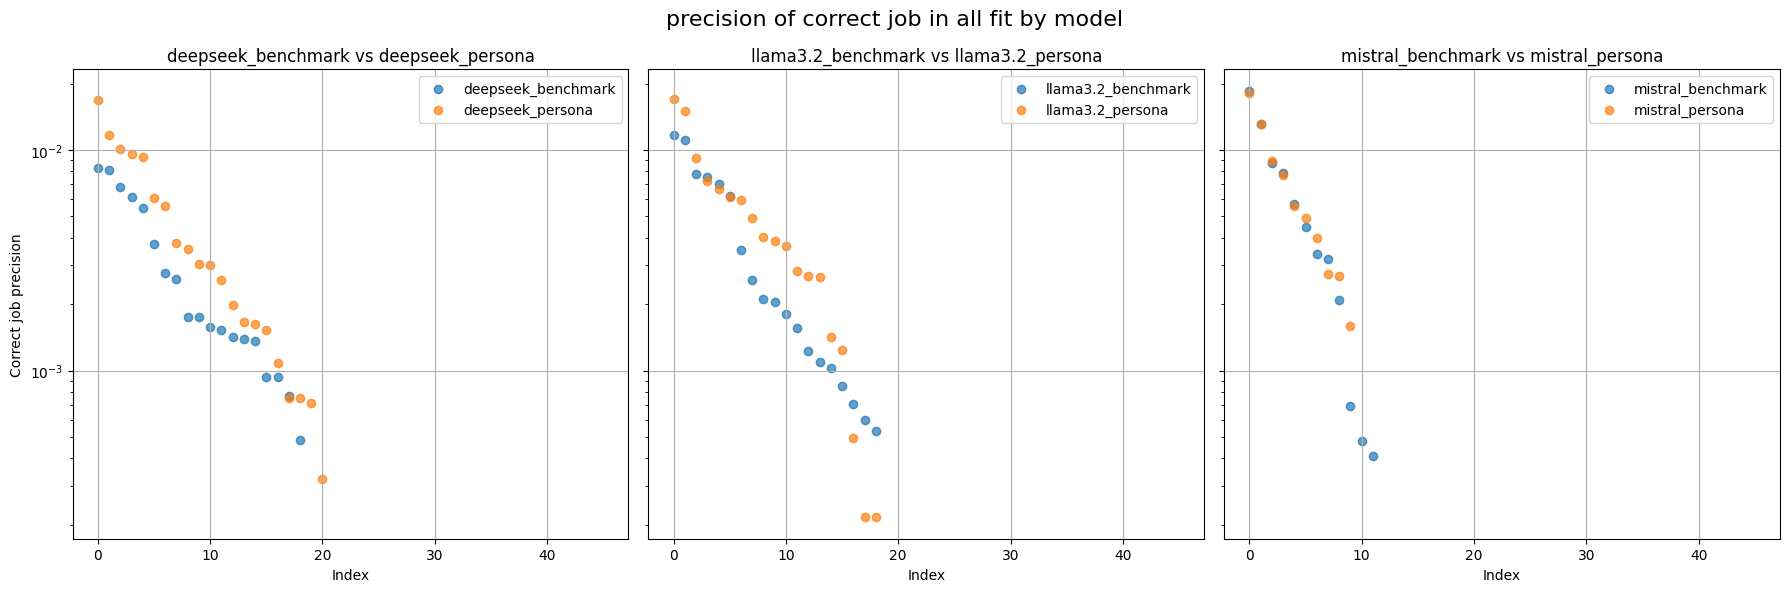

In [29]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("precision of correct job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_precision"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["c_all_fit_precision"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job precision")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_precision"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_precision"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_precision"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_precision"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



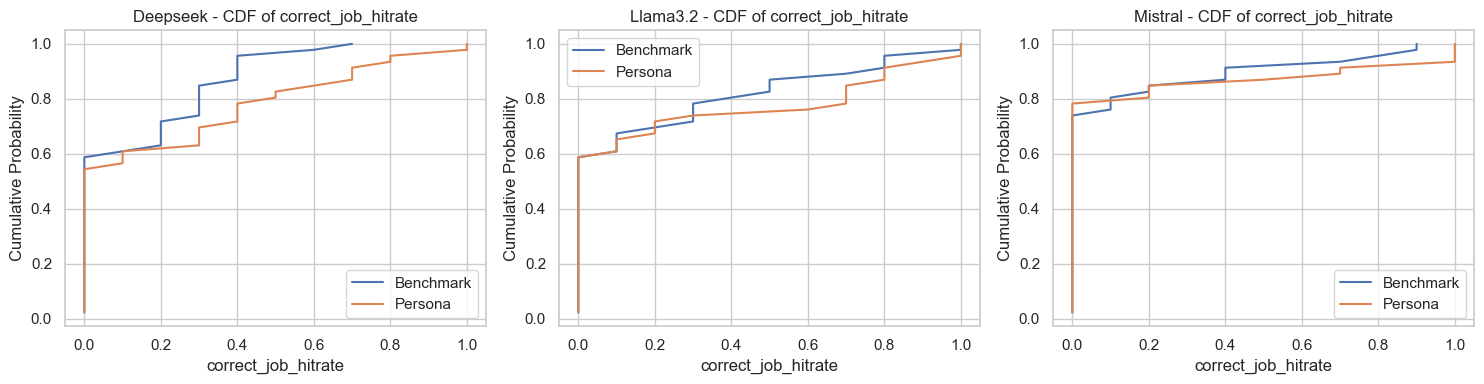

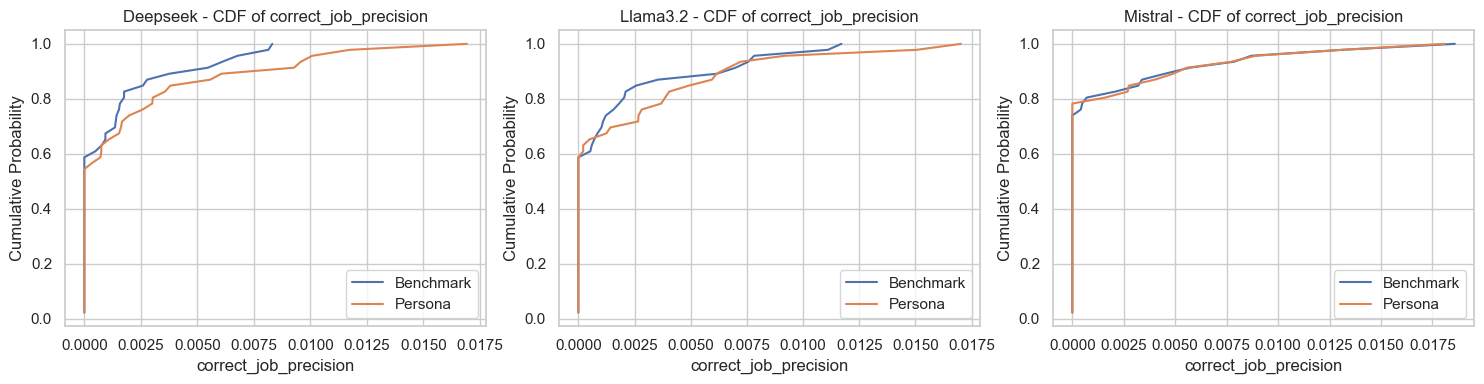

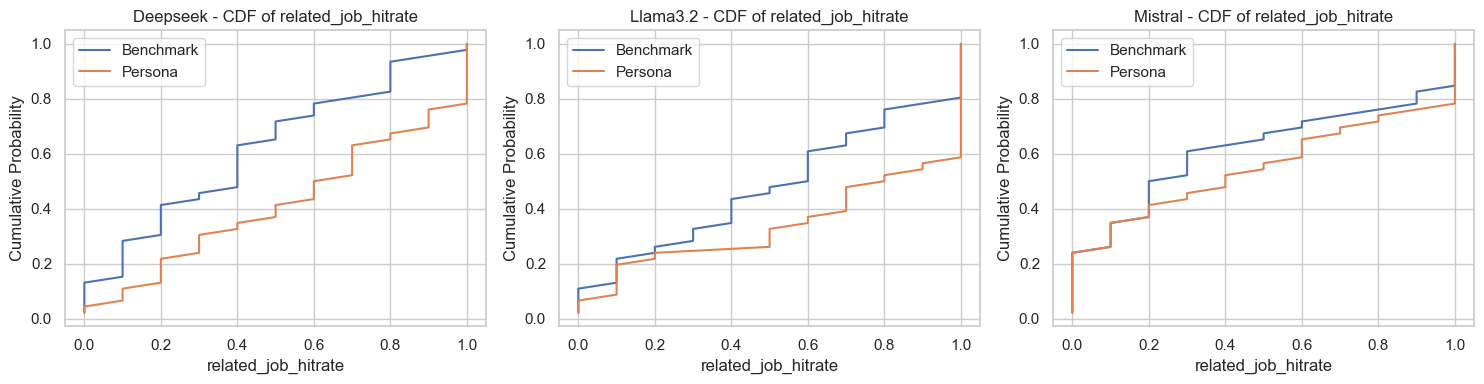

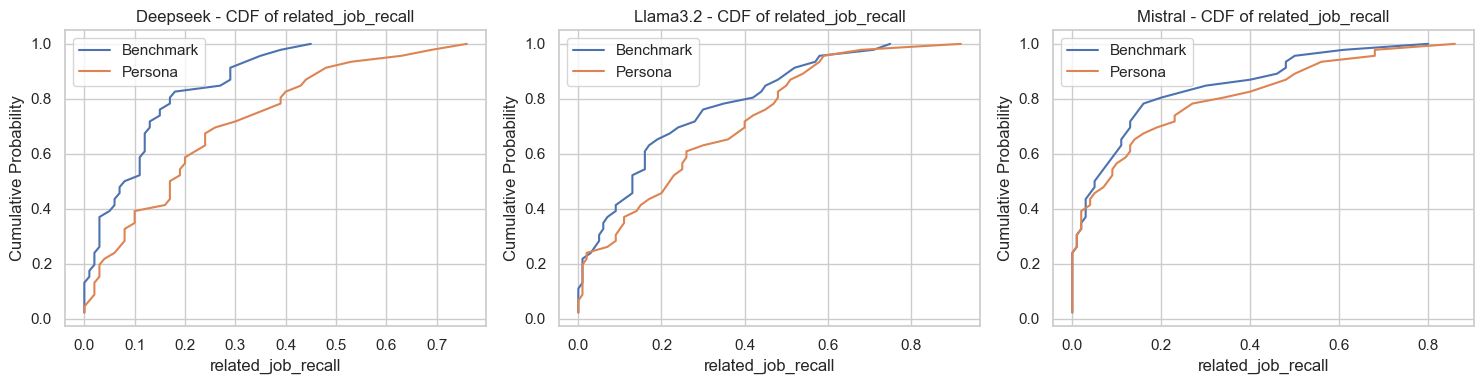

In [55]:
import seaborn as sns
# Set style
sns.set(style="whitegrid")

# # 1. Bar Plots with Means and Error Bars (per model)
# plt.figure(figsize=(12, 8))
# for i, metric in enumerate(["c_all_fit_hits", "c_best_fit_precision", "r_all_fit_hits", "r_all_fit_recall"], 1):
#     plt.subplot(2, 2, i)
#     sns.barplot(x="model", y=metric, hue="setup", data=test_dis, errorbar="sd")
#     plt.title(f"Mean {metric} with SD")
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # 2. Violin Plots (per model)
# plt.figure(figsize=(12, 8))
# for i, metric in enumerate(["c_all_fit_hits", "c_best_fit_precision", "r_all_fit_hits", "r_all_fit_recall"], 1):
#     plt.subplot(2, 2, i)
#     sns.violinplot(x="model", y=metric, hue="setup", split=True, data=test_dis, inner="quartile")
#     plt.title(f"Violin Plot of {metric}")
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# 3. CDF Plots (per model)
for metric in metrics:
    plt.figure(figsize=(15, 4))
    for i, model in enumerate(["deepseek", "llama3.2", "mistral"], 1):
        plt.subplot(1, 3, i)
        for setup in ["benchmark", "persona"]:
            data_subset = test_dis[(test_dis["model"] == model) & (test_dis["setup"] == setup)][metric]
            sorted_data = np.sort(data_subset)
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=setup.capitalize())
        plt.title(f"{model.capitalize()} - CDF of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Cumulative Probability")
        plt.legend()
    plt.tight_layout()
    plt.show()

### plot all metrics in industry

In [14]:
ind_df = full_df.copy()
ind_df = ind_df.drop(columns=["title", "zone"])
#group by ind and model, and agg all the columns start with c_ and r_ by mean, zone by first
ind_df = ind_df.groupby(["model", "ind"]).agg(lambda x: x.mean() if x.name.startswith(("c_", "r_",)) else x.tolist()).reset_index()
ind_df

KeyError: 'ind'

KeyError: 'ind'

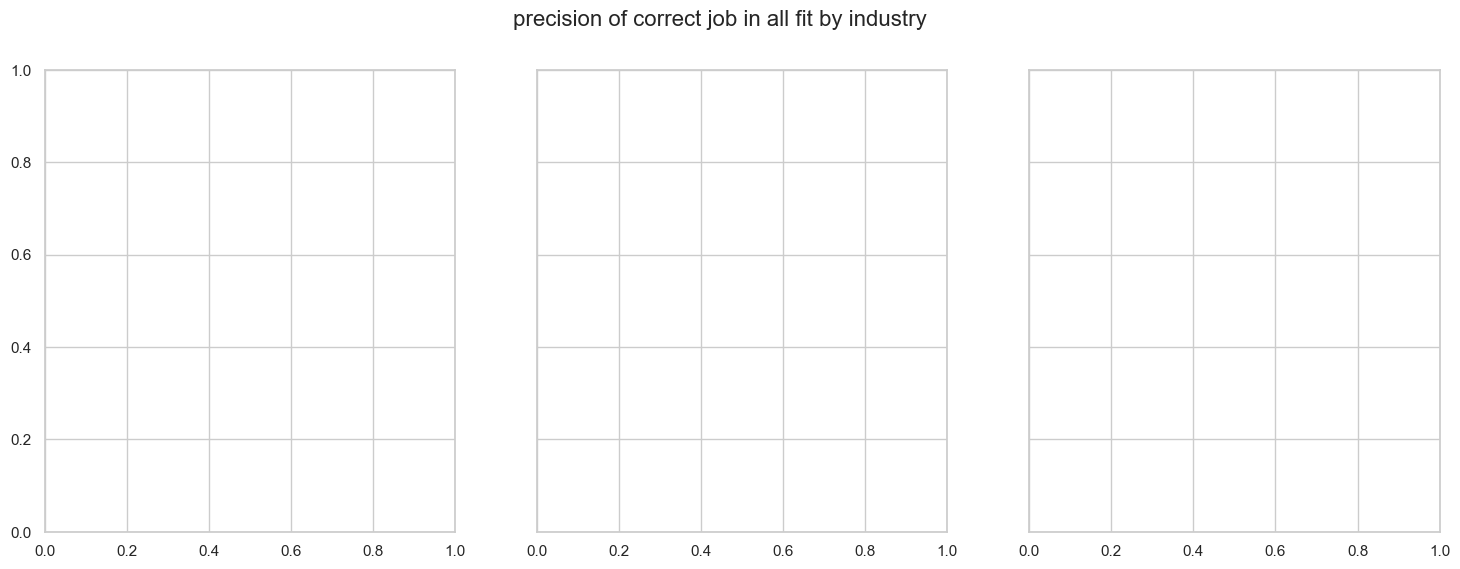

In [15]:
import numpy as np
import matplotlib.pyplot as plt

models = ind_df["model"].unique()

# Prepare data for the three models
benchmark_1 = ind_df[ind_df["model"] == models[0]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = ind_df[ind_df["model"] == models[1]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = ind_df[ind_df["model"] == models[2]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = ind_df[ind_df["model"] == models[3]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = ind_df[ind_df["model"] == models[4]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = ind_df[ind_df["model"] == models[5]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("precision of correct job in all fit by industry", fontsize=16)

# Plot for Model 1
# Map colors based on the 'ind' column
colors_benchmark_1 = benchmark_1["ind"].astype("category").cat.codes
colors_persona_1 = persona_1["ind"].astype("category").cat.codes

# Scatter plot with colors
scatter1 = axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_precision"], c=colors_benchmark_1, label=models[x], alpha=0.7, cmap="Spectral")
scatter2 = axes[0].scatter(persona_1["index"], persona_1["c_all_fit_precision"], c=colors_persona_1, label=models[1], alpha=0.7, cmap="Spectral")

# Add a colorbar for the 'ind' column
plt.colorbar(scatter1, ax=axes[0], label="Industry (ind)")
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job precision")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_precision"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_precision"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_precision"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_precision"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



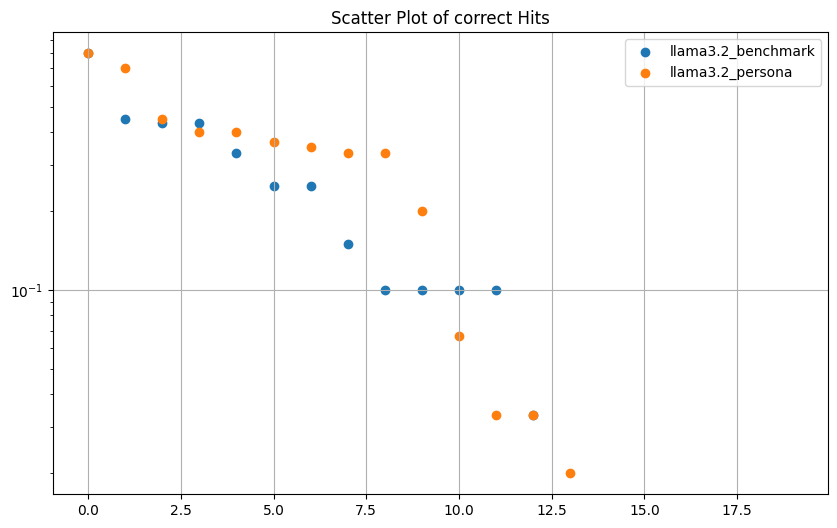

In [ ]:
import numpy as np
x = 2
#scatter plot c_all_fit_hits by descending order of value
benchmark = ind_df[ind_df["model"] == ind_df["model"].unique()[x]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark['index'] = np.arange(len(benchmark))

persona = ind_df[ind_df["model"] == ind_df["model"].unique()[x + 1]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona['index'] = np.arange(len(persona))

plt.figure(figsize=(10, 6))
plt.scatter(x=benchmark["index"], y=benchmark["c_all_fit_hits"], label=ind_df["model"].unique()[x])
plt.scatter(x=persona["index"], y=persona["c_all_fit_hits"], label=ind_df["model"].unique()[x + 1])

plt.yscale("log")
plt.legend()
plt.title("Scatter Plot of correct Hits")
plt.grid(True)
plt.show()

# use the above ocde as reference to plot pairplot of c_ and r_hit rates


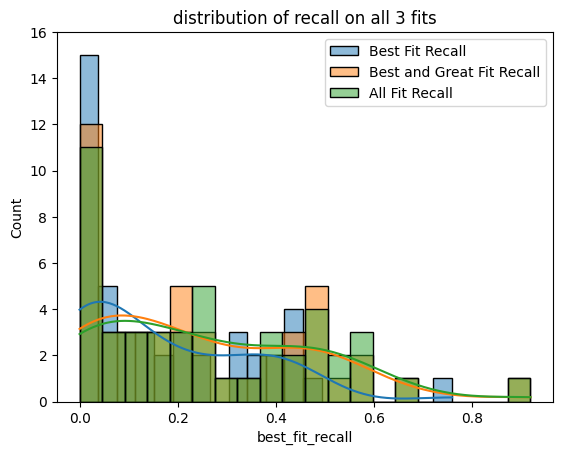

In [ ]:
#drop rows with all fit precision = 0
sns.histplot(data=check["best_fit_recall"], bins=20, kde=True, label="Best Fit Recall")
sns.histplot(data=check["best_and_great_fit_recall"], bins=20, kde=True, label="Best and Great Fit Recall")
sns.histplot(data=check["all_fit_recall"], bins=20, kde=True, label="All Fit Recall")
#find ylabel range from 0-18
plt.ylim(0, 16)
plt.ylabel("Count")
plt.legend()
plt.title("distribution of recall on all 3 fits")
plt.show()


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

# Simulated raw data (replace with your 2,760-row DataFrame)



# Test significance per model
models = ["deepseek", "llama3.2", "mistral"]
metrics = metrics
p_values = {}
for model in models:
    p_values[model] = {}
    df_model = test_dis[test_dis["model"] == model]
    for metric in metrics:
        bench = df_model[df_model["setup"] == "benchmark"][metric]
        persona = df_model[df_model["setup"] == "persona"][metric]
        stat, p = wilcoxon(bench, persona, alternative="two-sided")
        p_values[model][metric] = p

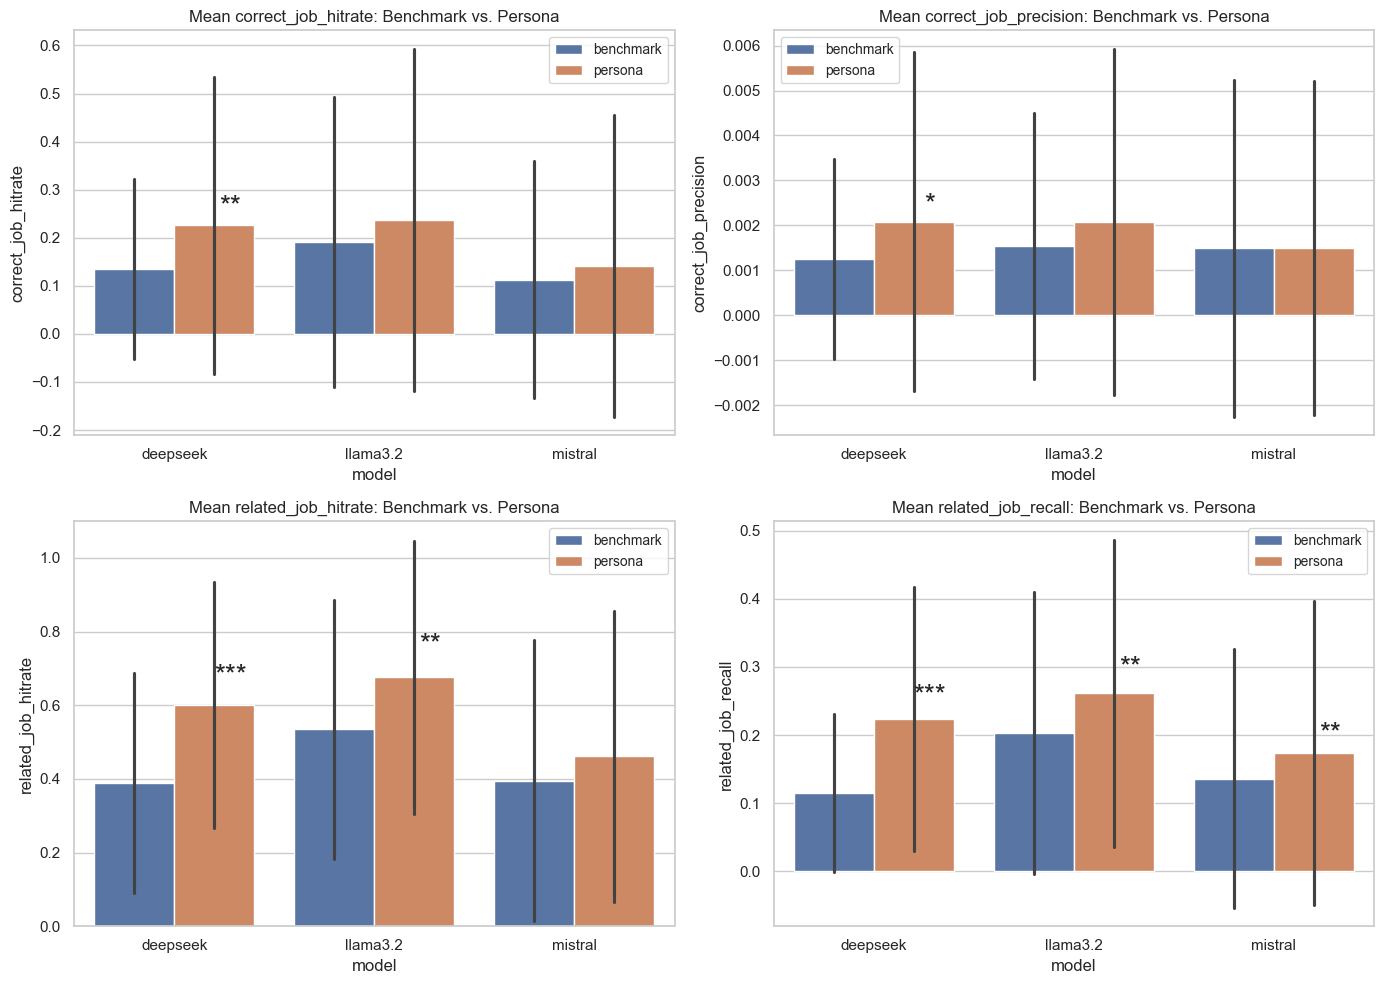

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.barplot(x="model", y=metric, hue="setup", data=test_dis, errorbar="sd")
    plt.title(f"Mean {metric}: Benchmark vs. Persona")
    plt.xticks()
    
    # Add significance stars
    for j, model in enumerate(models):
        p = p_values[model][metric]
        if p < 0.05:
            x = j + (0.2 if "persona" == "persona" else -0.2)  # Offset for hue
            y = test_dis[(test_dis["model"] == model) & (test_dis["setup"] == "persona")][metric].mean() * 1.1
            ax.text(x + 0.08, y, "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "****", ha="center", fontsize=20)
    plt.legend(fontsize="small")  # Set legend font size to small
plt.tight_layout()
plt.show()

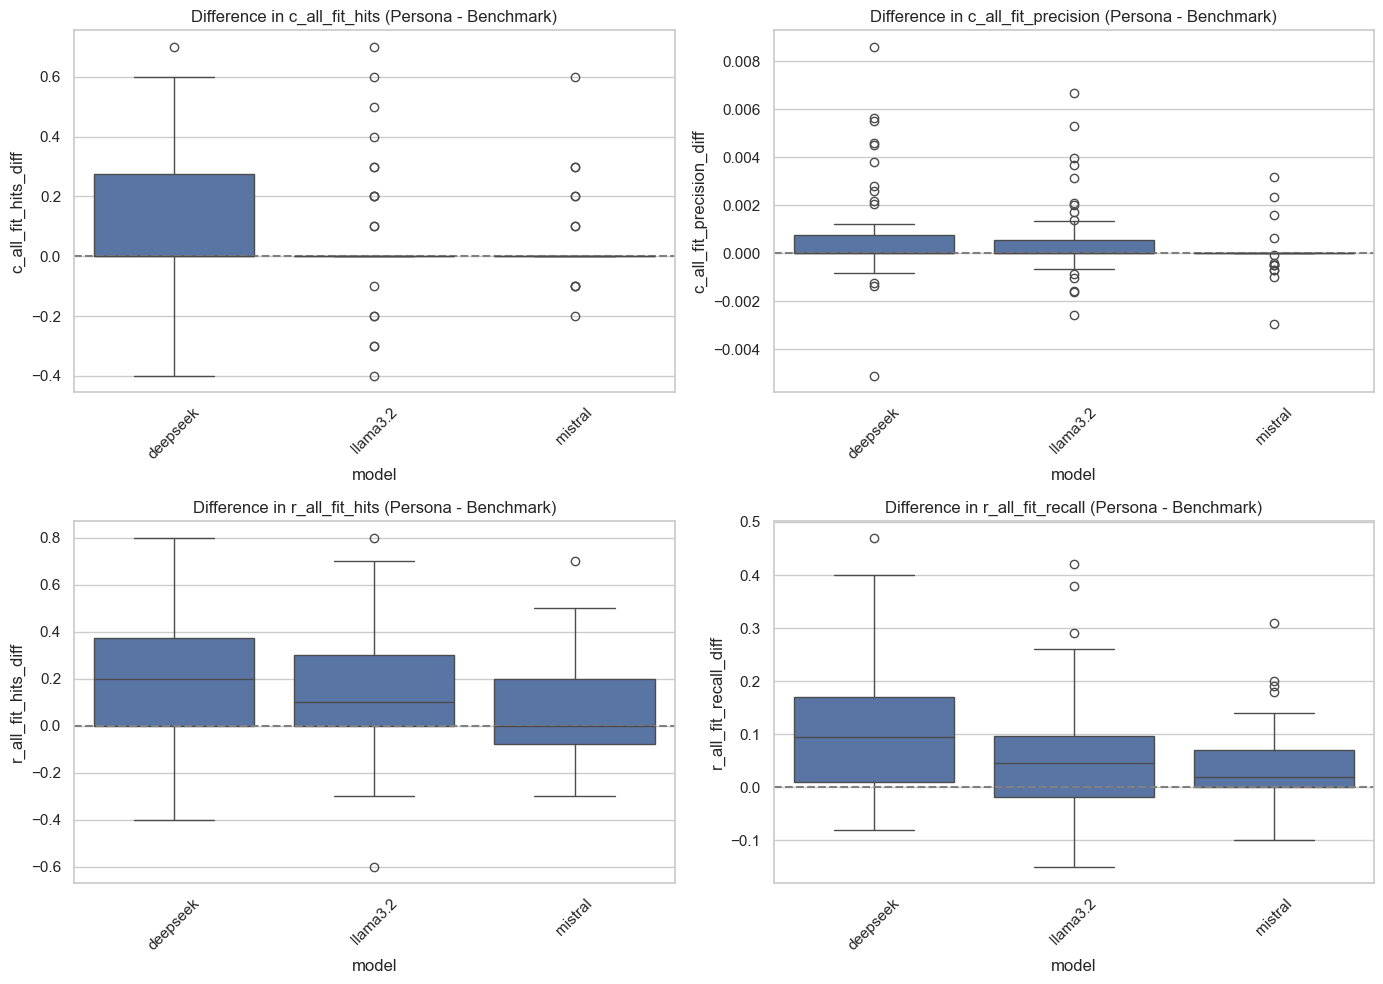

In [19]:
# Compute differences (Persona - Benchmark)
df_diff = test_dis.pivot_table(index=["title", "model"], columns="setup", values=metrics).reset_index()
for metric in metrics:
    df_diff[f"{metric}_diff"] = df_diff[metric]["persona"] - df_diff[metric]["benchmark"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="model", y=f"{metric}_diff", data=df_diff)
    plt.axhline(0, color="gray", linestyle="--")
    plt.title(f"Difference in {metric} (Persona - Benchmark)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
test

title  correct_job_hitrate  \
0     Property, Real Estate, and Community Associati...                    0   
1                       General and Operations Managers                    0   
2                        Emergency Management Directors                    1   
3                            Sustainability Specialists                    0   
4                        Project Management Specialists                    0   
...                                                 ...                  ...   
2755                   Patternmakers, Metal and Plastic                    0   
2756  Extruding and Drawing Machine Setters, Operato...                    0   
2757                                  Commercial Pilots                    0   
2758                                 Parking Attendants                    0   
2759                     Subway and Streetcar Operators                    0   

      correct_job_precision  related_job_hitrate  related_job_recall  \
0                  0.000000                    1                 0.5   
1                  0.000000                    1                 0.6   
2                  0.008696                    1                 0.3   
3                  0.000000                    0                 0.0   
4                  0.000000                    1                 0.1   
...                     ...                  ...                 ...   
2755               0.000000                    0                 0.0   
2756               0.000000                    0                 0.0   
2757               0.000000                    0                 0.0   
2758               0.000000                    0                 0.0   
2759               0.000000                    0                 0.0   

         model  zone industry      setup  trial  
0     deepseek     4       11  benchmark      1  
1     deepseek     4       11  benchmark      1  
2     deepseek     4       11  benchmark      1  
3     deepseek     4       13  benchmark      1  
4     deepseek     4       13  benchmark      1  
...        ...   ...      ...        ...    ...  
2755   mistral     3       51    persona     10  
2756   mistral     2       51    persona     10  
2757   mistral     3       53    persona     10  
2758   mistral     2       53    persona     10  
2759   mistral     2       53    persona     10  

[2760 rows x 10 columns]

In [52]:
summary = pd.DataFrame({
    "Model": np.repeat(models, len(metrics)),
    "Metric": metrics * 3,
    "Benchmark Mean": [test_dis[(test_dis["model"] == m) & (test_dis["setup"] == "benchmark")][met].mean() for m in models for met in metrics],
    "Persona Mean": [test_dis[(test_dis["model"] == m) & (test_dis["setup"] == "persona")][met].mean() for m in models for met in metrics],
    "p-value": [f"{p_values[m][met]:.4f}" + ("***" if p_values[m][met] < 0.001 else "**" if p_values[m][met] < 0.01 else "*" if p_values[m][met] < 0.05 else "") for m in models for met in metrics]
})
summary.round(4)

Model                 Metric  Benchmark Mean  Persona Mean    p-value
0   deepseek    correct_job_hitrate          0.1348        0.2261   0.0089**
1   deepseek  correct_job_precision          0.0013        0.0021    0.0156*
2   deepseek    related_job_hitrate          0.3891        0.6000  0.0000***
3   deepseek     related_job_recall          0.1152        0.2235  0.0000***
4   llama3.2    correct_job_hitrate          0.1913        0.2370     0.2008
5   llama3.2  correct_job_precision          0.0015        0.0021     0.0582
6   llama3.2    related_job_hitrate          0.5348        0.6761   0.0021**
7   llama3.2     related_job_recall          0.2026        0.2615   0.0025**
8    mistral    correct_job_hitrate          0.1130        0.1413     0.1958
9    mistral  correct_job_precision          0.0015        0.0015     0.7007
10   mistral    related_job_hitrate          0.3957        0.4609     0.0908
11   mistral     related_job_recall          0.1361        0.1737   0.0034**

In [63]:
metrics

['c_all_fit_hits', 'c_all_fit_precision', 'r_all_fit_hits', 'r_all_fit_recall']

In [65]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated raw data (replace with your 2,760-row DataFrame)


# Aggregate for visualization
df_agg = test.groupby(["title", "model", "setup", "zone", "industry"]).mean().reset_index()

# Job-level significance
models = ["deepseek", "llama3.2", "mistral"]
metrics = metrics
job_insights = {}
for model in models:
    job_insights[model] = {}
    df_model = test[test["model"] == model]
    for metric in metrics:
        job_insights[model][metric] = []
        for title in df_model["title"].unique():
            bench = df_model[(df_model["title"] == title) & (df_model["setup"] == "benchmark")][metric]
            persona = df_model[(df_model["title"] == title) & (df_model["setup"] == "persona")][metric]
            stat, p = wilcoxon(bench, persona, alternative="two-sided")
            mean_diff = persona.mean() - bench.mean()
            job_insights[model][metric].append((title, mean_diff, p))
        job_insights[model][metric] = sorted(job_insights[model][metric], key=lambda x: x[1], reverse=True)

# Industry/Zone trends
df_diff = df_agg.pivot_table(index=["title", "model", "zone", "industry"], columns="setup", values=metrics).reset_index()
for metric in metrics:
    df_diff[f"{metric}_diff"] = df_diff[metric]["persona"] - df_diff[metric]["benchmark"]
industry_trends = df_diff.groupby(["model", "industry"]).mean(numeric_only=True).reset_index()
zone_trends = df_diff.groupby(["model", "zone"]).mean(numeric_only=True).reset_index()
overall_diff = df_diff.groupby("model").mean(numeric_only=True)[[f"{m}_diff" for m in metrics]]

c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_wilcoxon.py:172: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\1537568119.py:34: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  industry_trends = df_diff.groupby(["model", "industry"]).mean(numeric_only=True).reset_index()
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\1537568119.py:35: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  zone_trends = df_diff.groupby(["model", "zone"]).mean(numeric_only=True).reset_index()
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\1537568119.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  overall_diff = df_diff.groupby("model").mean(numeric_only=True)[[f"{m}_diff" for m in metrics]

C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


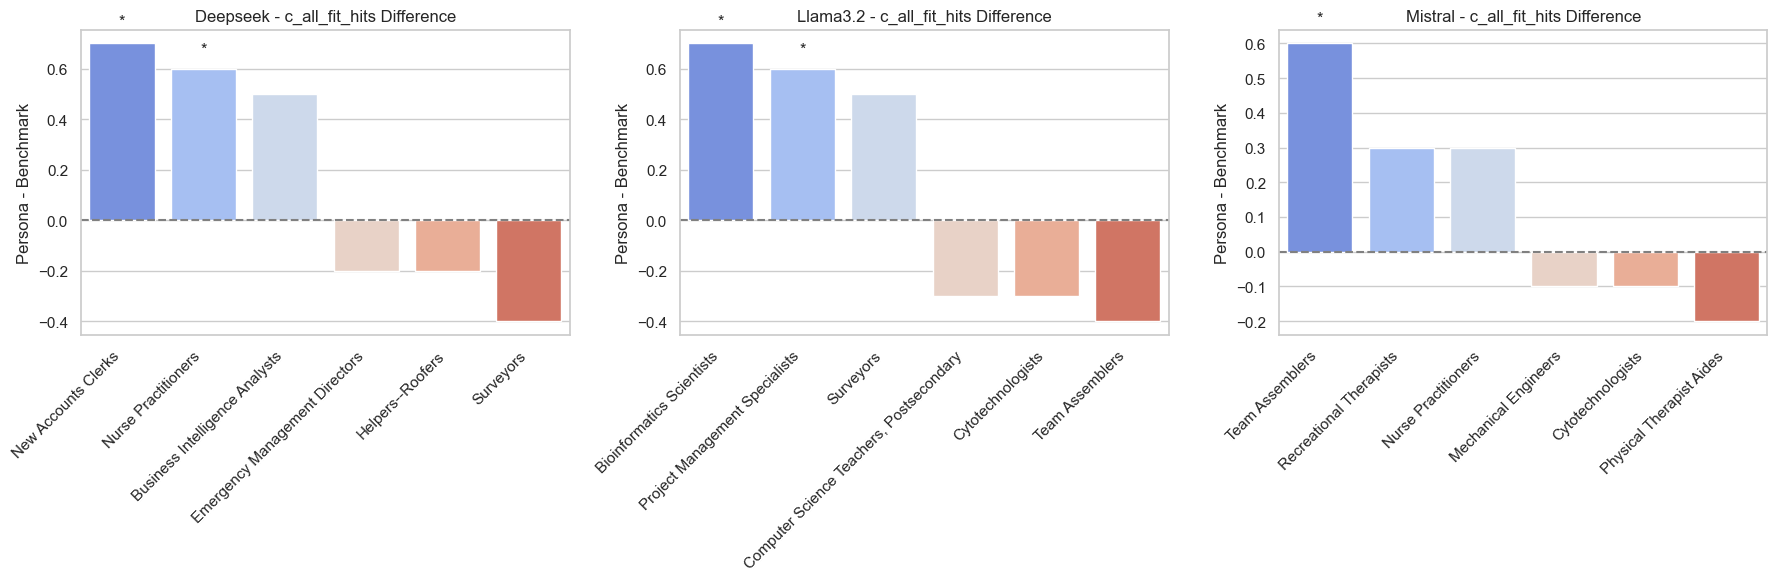

C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


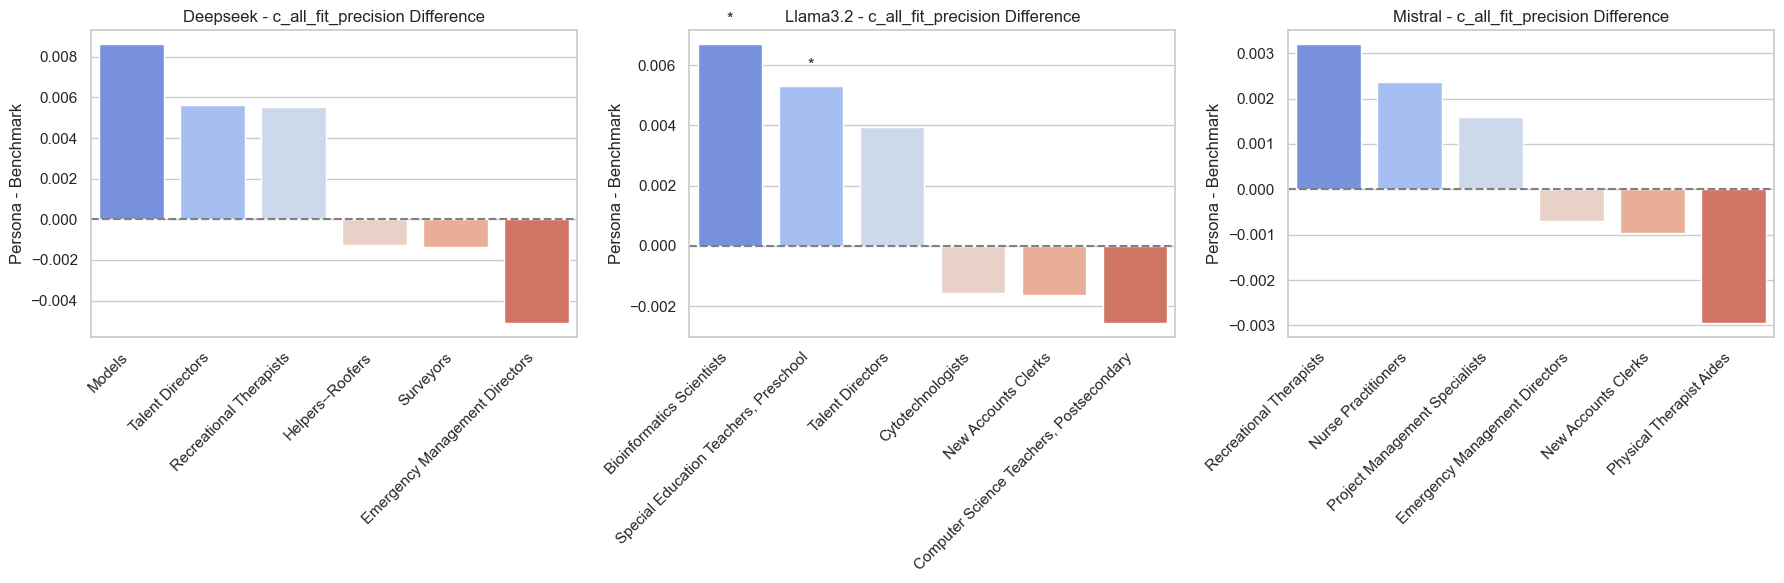

C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


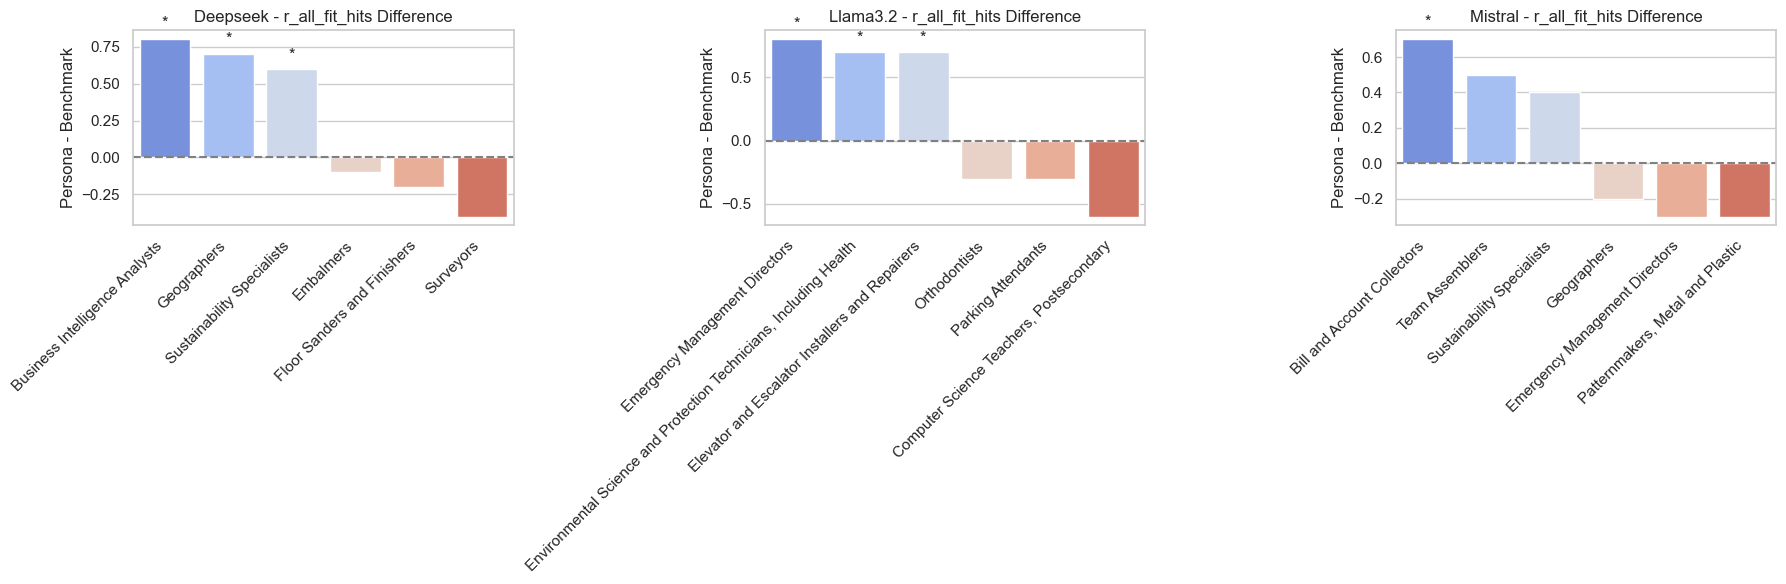

C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_6116\2030413925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


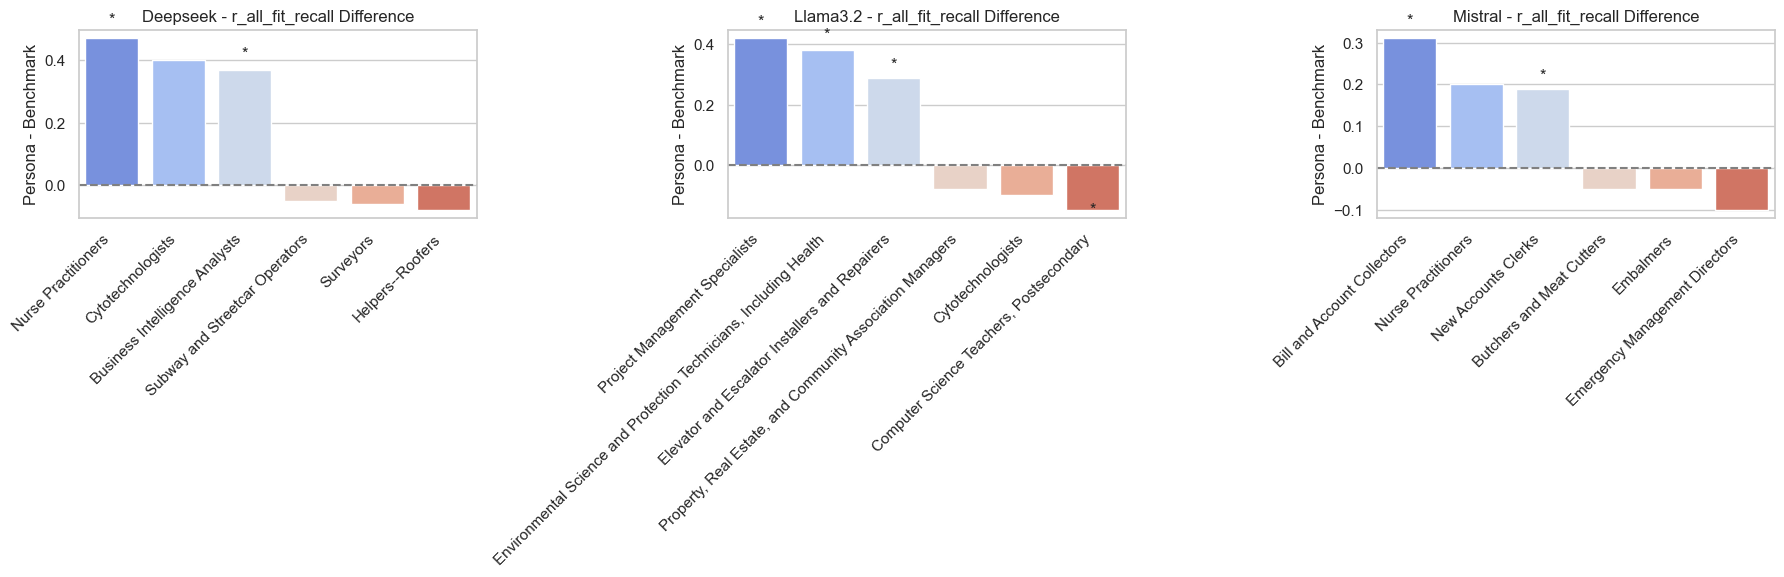

In [55]:
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(18, 6))
    for i, model in enumerate(models, 1):
        plt.subplot(1, 3, i)
        top_bottom = job_insights[model][metric][:3] + job_insights[model][metric][-3:]  # Top 3 and bottom 3
        titles, diffs, p_vals = zip(*top_bottom)
        ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
        plt.axhline(0, color="gray", linestyle="--")
        plt.title(f"{model.capitalize()} - {metric} Difference")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Persona - Benchmark")
        # Add significance stars
        for j, p in enumerate(p_vals):
            if p < 0.05:
                ax.text(j, diffs[j] * 1.1, "*" if p < 0.05 else "**" if p < 0.01 else "***", ha="center")
    plt.tight_layout()
    plt.show()

In [66]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated raw data (replace with your 2,760-row DataFrame)
df_raw = test

# Aggregate for visualization
df_agg = df_raw.groupby(["title", "model", "setup", "zone", "industry"]).mean().reset_index()

# Job-level significance
models = ["deepseek", "llama3.2", "mistral"]
metrics = metrics
job_insights = {}
for model in models:
    job_insights[model] = {}
    df_model = df_raw[df_raw["model"] == model]
    for metric in metrics:
        job_insights[model][metric] = []
        for title in df_model["title"].unique():
            bench = df_model[(df_model["title"] == title) & (df_model["setup"] == "benchmark")][metric].values
            persona = df_model[(df_model["title"] == title) & (df_model["setup"] == "persona")][metric].values
            if np.all(bench == persona):
                p = 1.0
            else:
                stat, p = wilcoxon(bench, persona, alternative="two-sided")
            mean_diff = persona.mean() - bench.mean()
            if p < 0.05:
                job_insights[model][metric].append((title, mean_diff, p))

# Industry/Zone significance
industry_insights = {}
zone_insights = {}
for model in models:
    industry_insights[model] = {}
    zone_insights[model] = {}
    df_model = df_raw[df_raw["model"] == model]
    for metric in metrics:
        industry_insights[model][metric] = []
        zone_insights[model][metric] = []
        # Industry
        for industry in df_model["industry"].unique():
            bench = df_model[(df_model["industry"] == industry) & (df_model["setup"] == "benchmark")][metric].values
            persona = df_model[(df_model["industry"] == industry) & (df_model["setup"] == "persona")][metric].values
            if len(bench) == len(persona) and np.all(bench == persona):
                p = 1.0
            else:
                stat, p = wilcoxon(bench, persona, alternative="two-sided")
            mean_diff = persona.mean() - bench.mean()
            industry_insights[model][metric].append((industry, mean_diff, p))
        # Zone
        for zone in df_model["zone"].unique():
            bench = df_model[(df_model["zone"] == zone) & (df_model["setup"] == "benchmark")][metric].values
            persona = df_model[(df_model["zone"] == zone) & (df_model["setup"] == "persona")][metric].values
            if len(bench) == len(persona) and np.all(bench == persona):
                p = 1.0
            else:
                stat, p = wilcoxon(bench, persona, alternative="two-sided")
            mean_diff = persona.mean() - bench.mean()
            zone_insights[model][metric].append((zone, mean_diff, p))

# Prepare heatmap data
df_diff = df_agg.pivot_table(index=["title", "model", "zone", "industry"], columns="setup", values=metrics).reset_index()
df_diff.columns = ["title", "model", "zone", "industry"] + [f"{metric}_{setup}" for metric in metrics for setup in ["benchmark", "persona"]]
for metric in metrics:
    df_diff[f"{metric}_diff"] = df_diff[f"{metric}_persona"] - df_diff[f"{metric}_benchmark"]
industry_trends = df_diff.groupby(["model", "industry"]).mean(numeric_only=True).reset_index()
zone_trends = df_diff.groupby(["model", "zone"]).mean(numeric_only=True).reset_index()

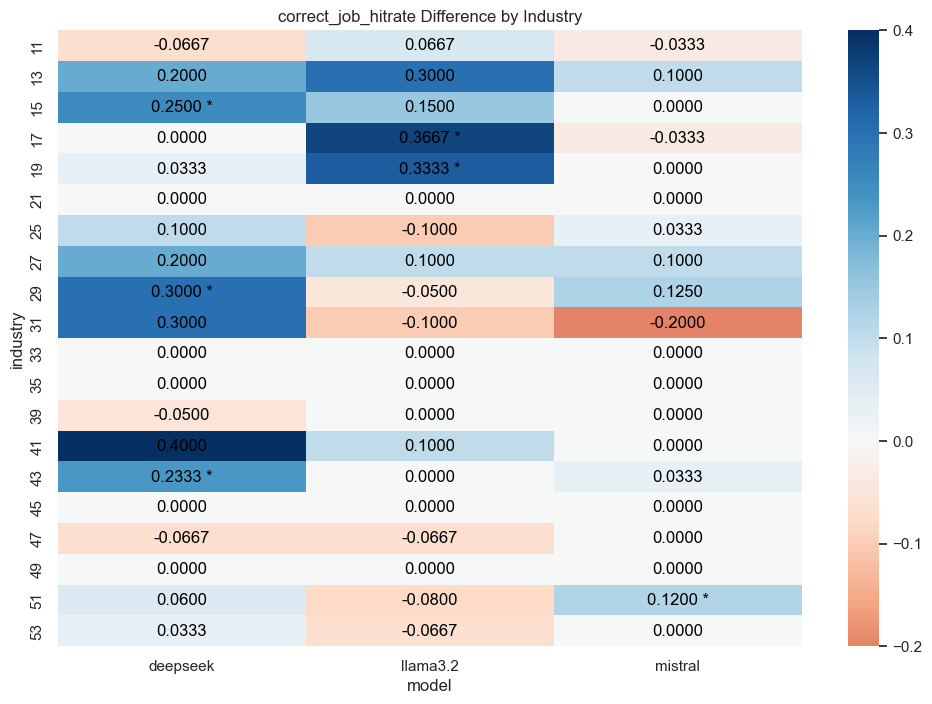

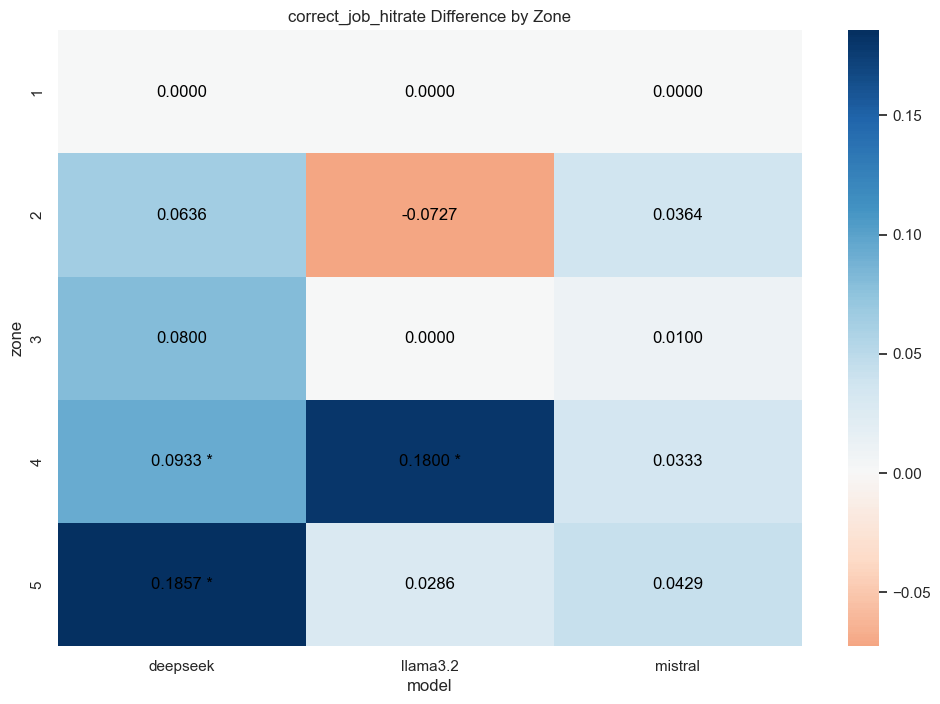

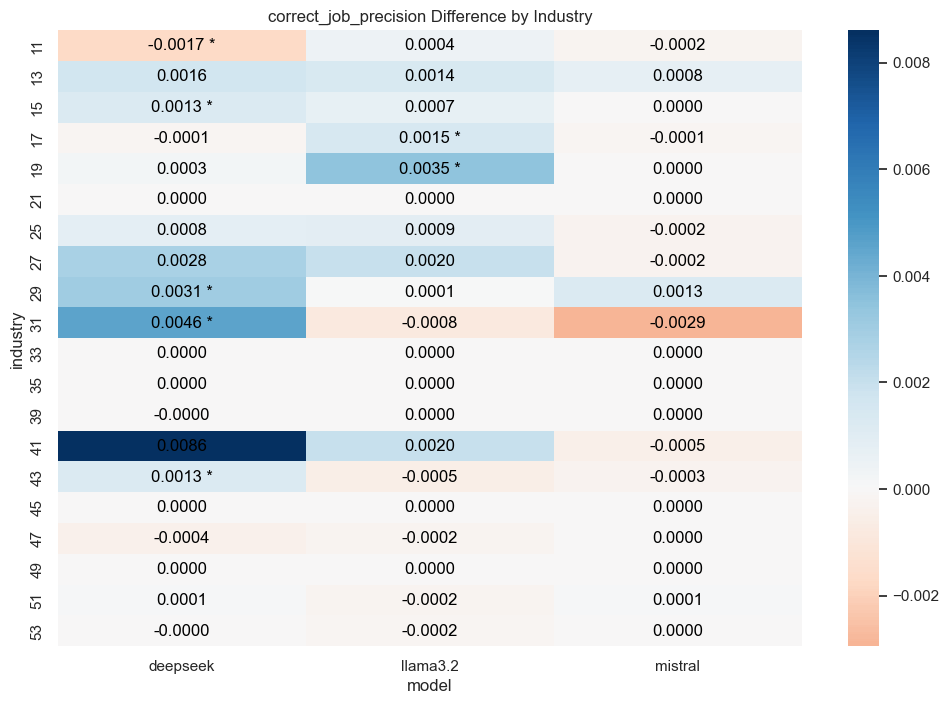

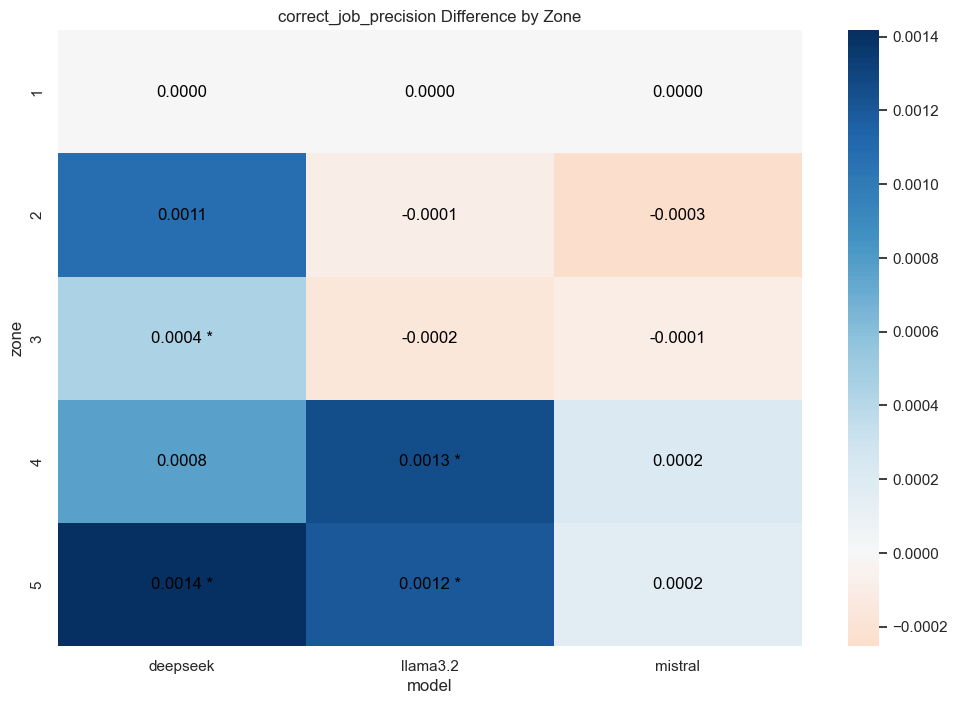

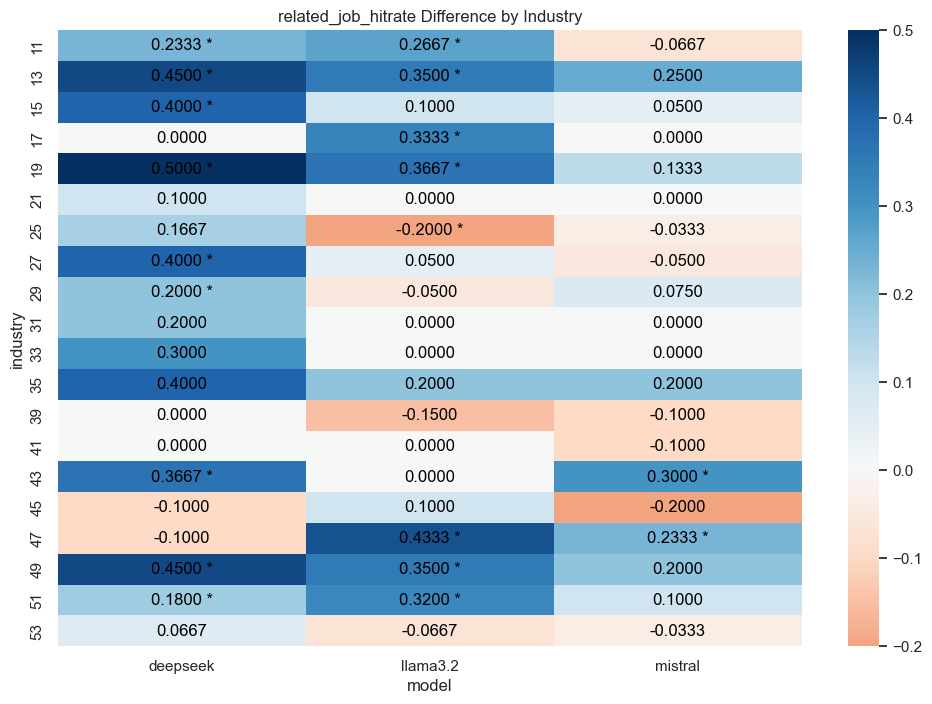

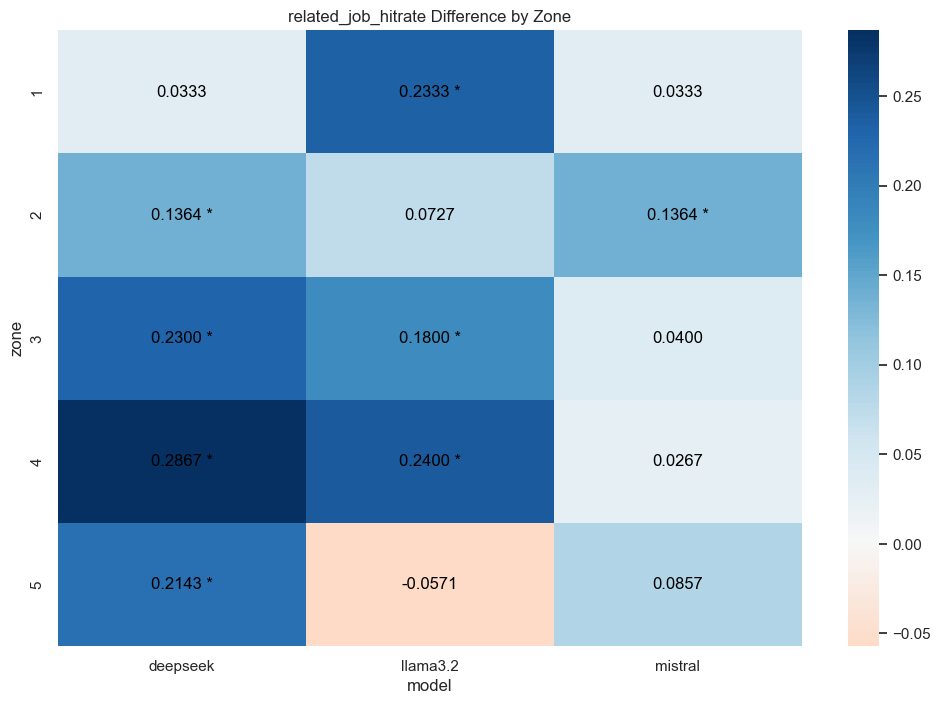

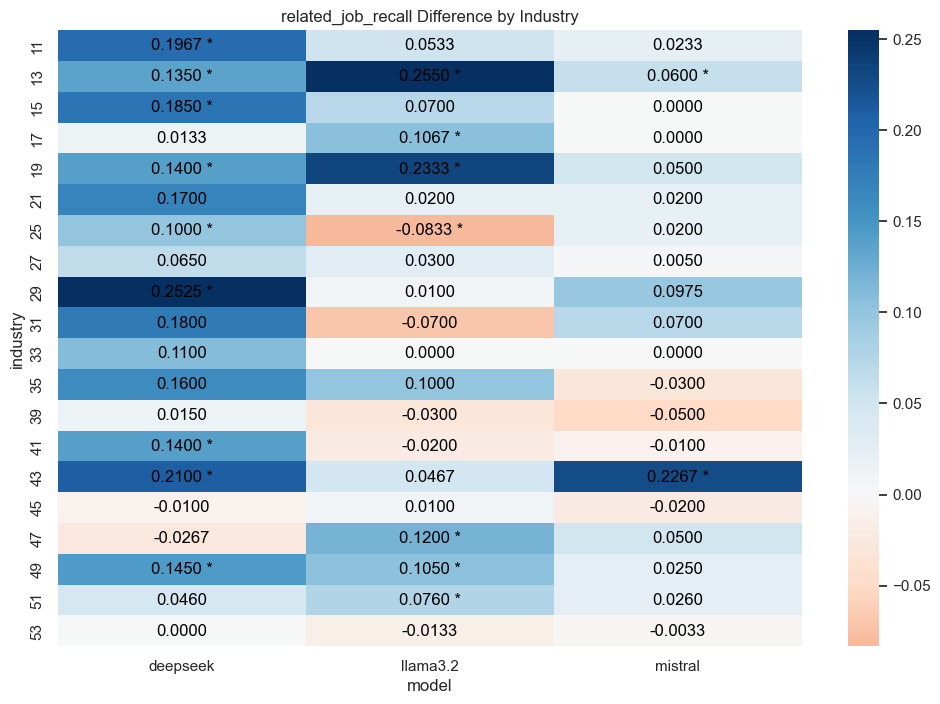

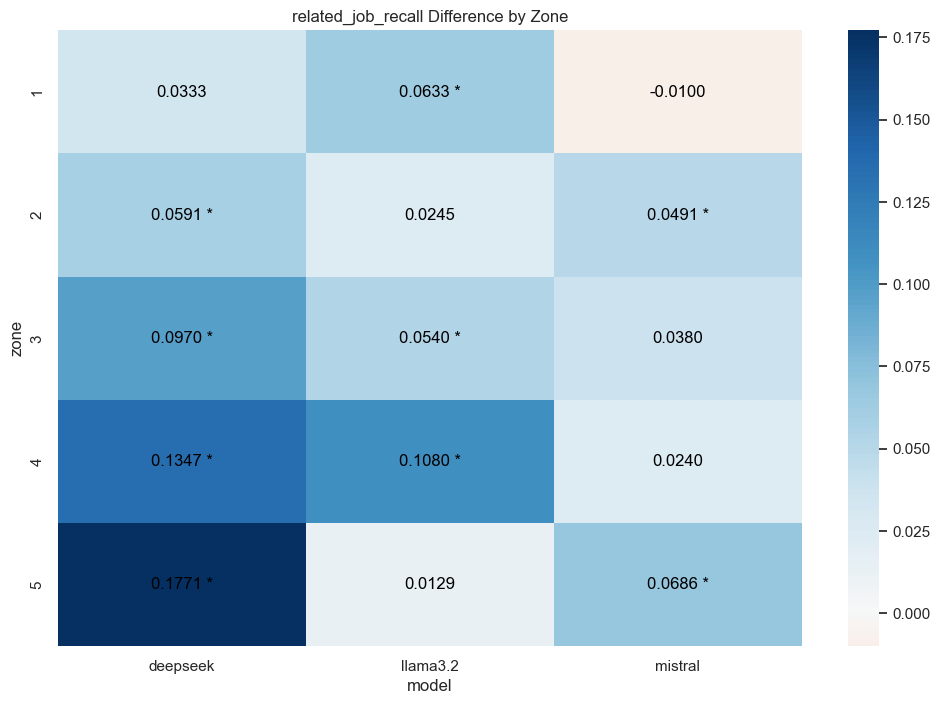

In [70]:
for metric in metrics:
    # Industry Heatmap
    plt.figure(figsize=(12, 8))
    pivot = industry_trends.pivot(index="industry", columns="model", values=f"{metric}_diff")
    sns.heatmap(pivot, cmap="RdBu", center=0, annot=False, fmt=".4f")
    for model in models:
        for industry, diff, p in industry_insights[model][metric]:
            col_idx = models.index(model)
            row_idx = pivot.index.get_loc(industry)
            star = "*" if p < 0.05 else "**" if p < 0.01 else "***" if p < 0.001 else ""
            if star:
                plt.text(col_idx + 0.5, row_idx + 0.5, f"{diff:.4f} {star}", ha="center", va="center", color="black")
            else:
                plt.text(col_idx + 0.5, row_idx + 0.5, f"{diff:.4f}", ha="center", va="center", color="black")
    plt.title(f"{metric} Difference by Industry")
    plt.show()

    # Zone Heatmap
    plt.figure(figsize=(12, 8))
    pivot = zone_trends.pivot(index="zone", columns="model", values=f"{metric}_diff")
    sns.heatmap(pivot, cmap="RdBu", center=0, annot=False, fmt=".4f")
    for model in models:
        for zone, diff, p in zone_insights[model][metric]:
            col_idx = models.index(model)
            row_idx = pivot.index.get_loc(zone)
            star = "*" if p < 0.05 else "**" if p < 0.01 else "***" if p < 0.001 else ""
            if star:
                plt.text(col_idx + 0.5, row_idx + 0.5, f"{diff:.4f} {star}", ha="center", va="center", color="black")
            else:
                plt.text(col_idx + 0.5, row_idx + 0.5, f"{diff:.4f}", ha="center", va="center", color="black")
    plt.title(f"{metric} Difference by Zone")
    plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


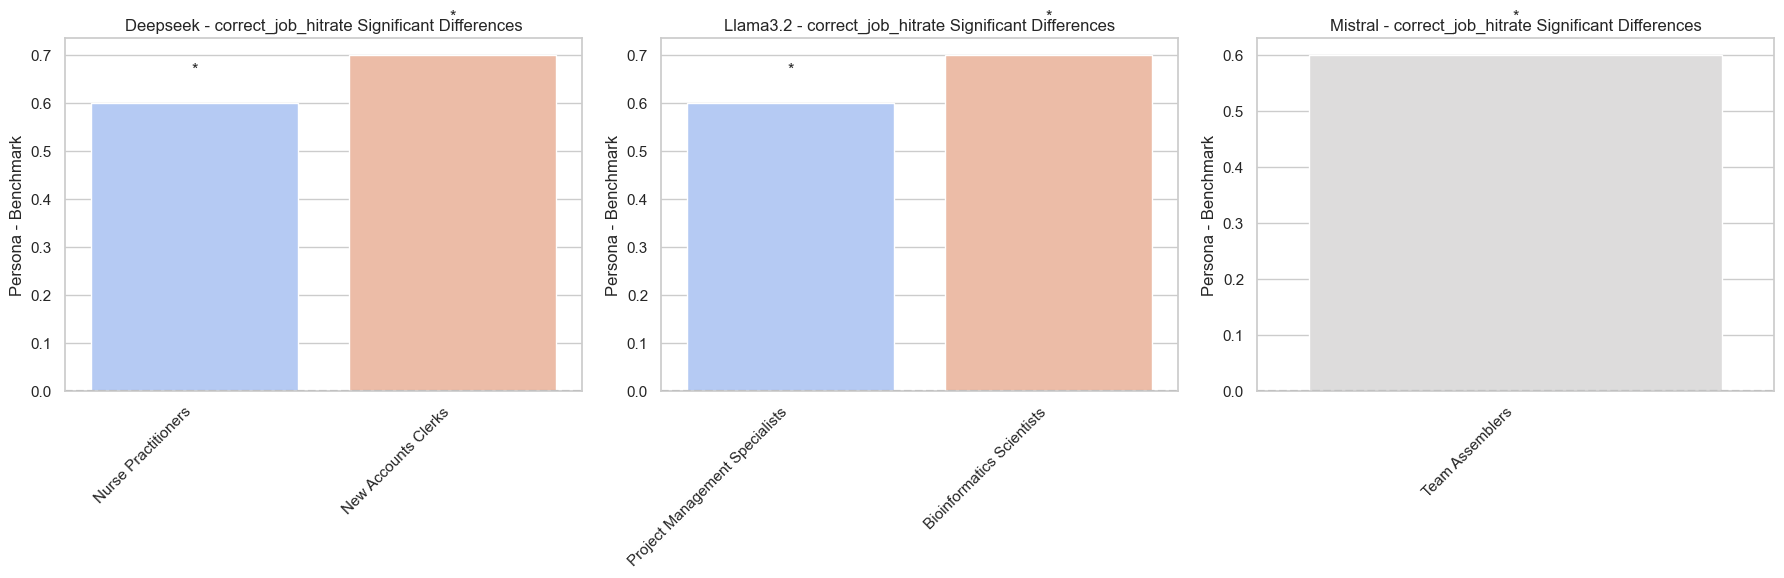

C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


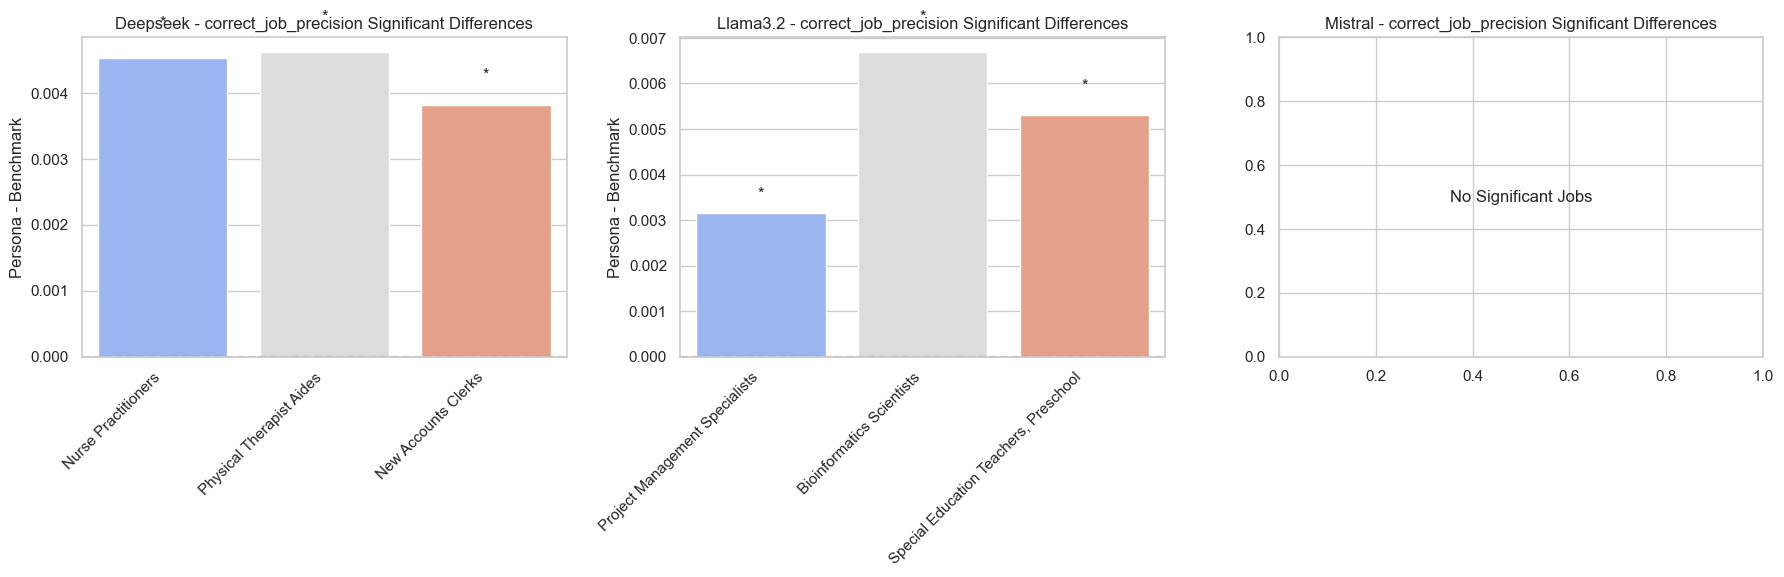

C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


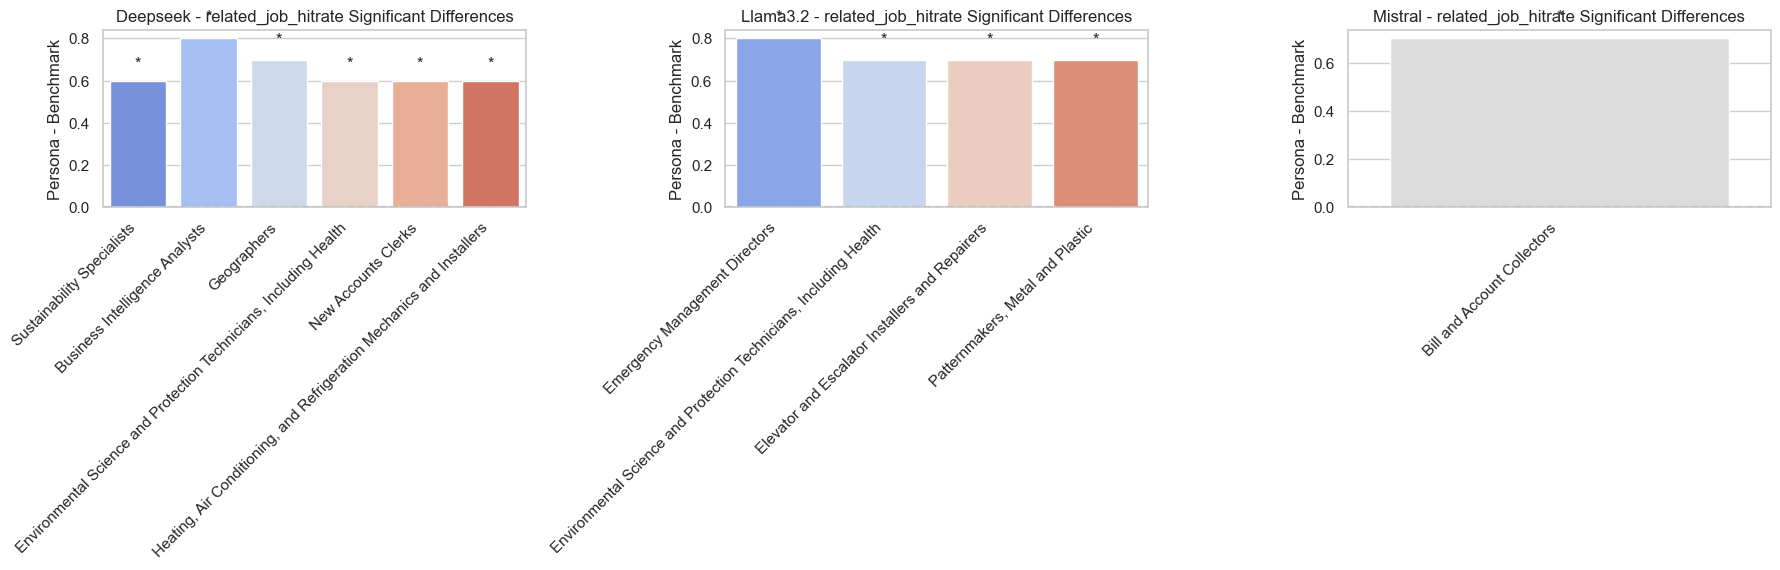

C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
C:\Users\godfr\AppData\Local\Temp\ipykernel_1116\3143877597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")


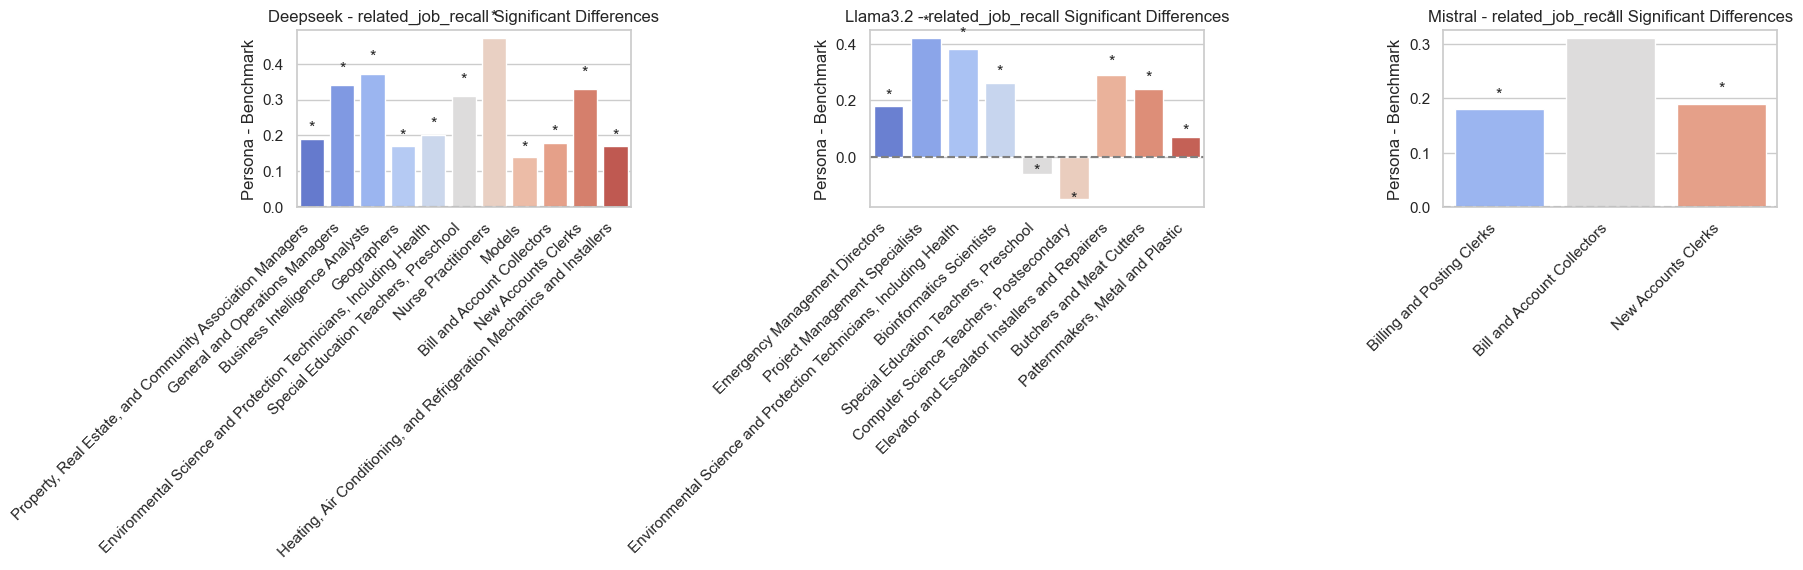

In [77]:
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(18, 6))
    for i, model in enumerate(models, 1):
        plt.subplot(1, 3, i)
        if job_insights[model][metric]:  # Check if there are significant jobs
            titles, diffs, p_vals = zip(*job_insights[model][metric])
            ax = sns.barplot(x=list(titles), y=list(diffs), palette="coolwarm")
            plt.axhline(0, color="gray", linestyle="--")
            plt.title(f"{model.capitalize()} - {metric} Significant Differences")
            plt.xticks(rotation=45, ha="right")
            plt.ylabel("Persona - Benchmark")
            # Add significance starsa
            for j, p in enumerate(p_vals):
                ax.text(j, diffs[j] * 1.1, "*" if p < 0.05 else "**" if p < 0.01 else "***", ha="center")
        else:
            plt.text(0.5, 0.5, "No Significant Jobs", ha="center", va="center")
            plt.title(f"{model.capitalize()} - {metric} Significant Differences")
    plt.tight_layout()
    plt.show()

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns


df_raw = test
# Job-level significance
models = ["deepseek", "llama3.2", "mistral"]
metrics = metrics
job_insights = {}
significant_jobs = []
for model in models:
    job_insights[model] = {}
    df_model = df_raw[df_raw["model"] == model]
    for metric in metrics:
        job_insights[model][metric] = []
        for title in df_model["title"].unique():
            bench = df_model[(df_model["title"] == title) & (df_model["setup"] == "benchmark")][metric].to_numpy()
            persona = df_model[(df_model["title"] == title) & (df_model["setup"] == "persona")][metric].to_numpy()
            if np.all(bench == persona):
                p = 1.0
            else:
                stat, p = wilcoxon(bench, persona, alternative="two-sided")
            mean_diff = persona.mean() - bench.mean()
            if p < 0.05:
                job_insights[model][metric].append((title, mean_diff, p))
                significant_jobs.append({"model": model, "metric": metric, "title": title, "diff": mean_diff, "p": p})

# Convert to DataFrame
df_significant = pd.DataFrame(significant_jobs)

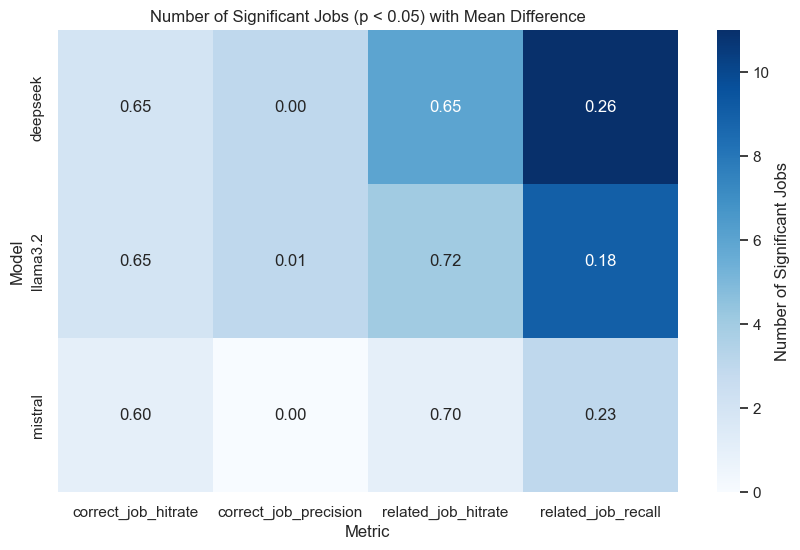

In [73]:
# Count significant jobs per model/metric
sig_counts = df_significant.groupby(["model", "metric"]).size().unstack(fill_value=0)
# Mean differences for annotation
mean_diffs = df_significant.groupby(["model", "metric"])["diff"].mean().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(sig_counts, cmap="Blues", annot=mean_diffs.round(2), fmt=".2f", cbar_kws={"label": "Number of Significant Jobs"})
plt.title("Number of Significant Jobs (p < 0.05) with Mean Difference")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.show()

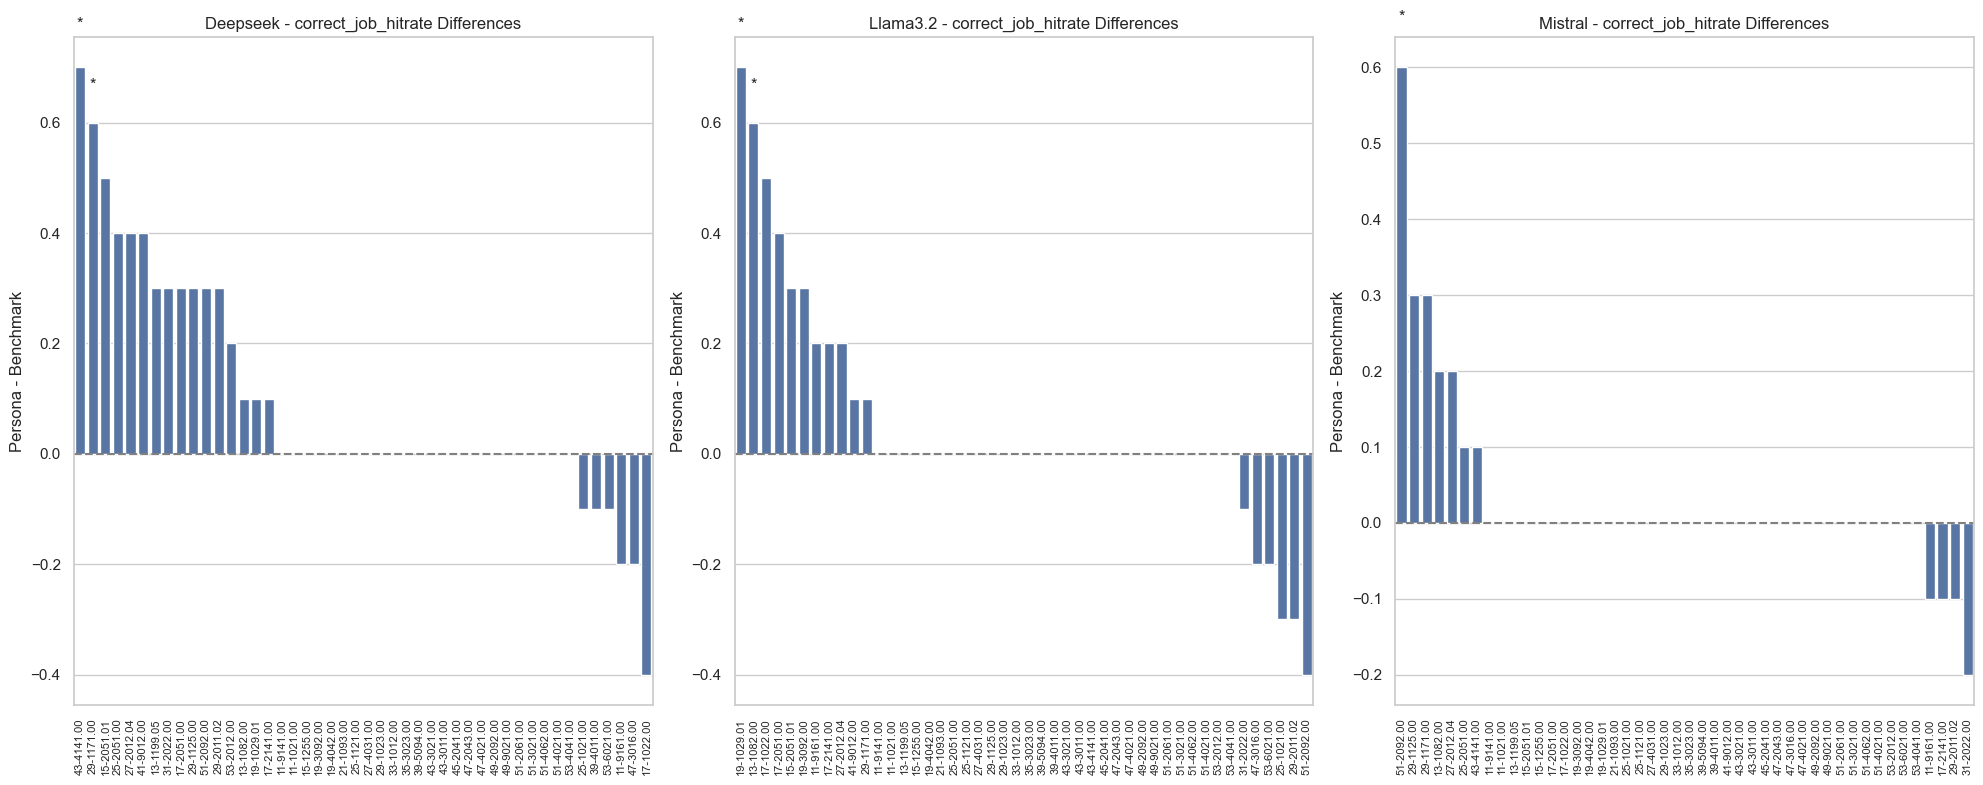

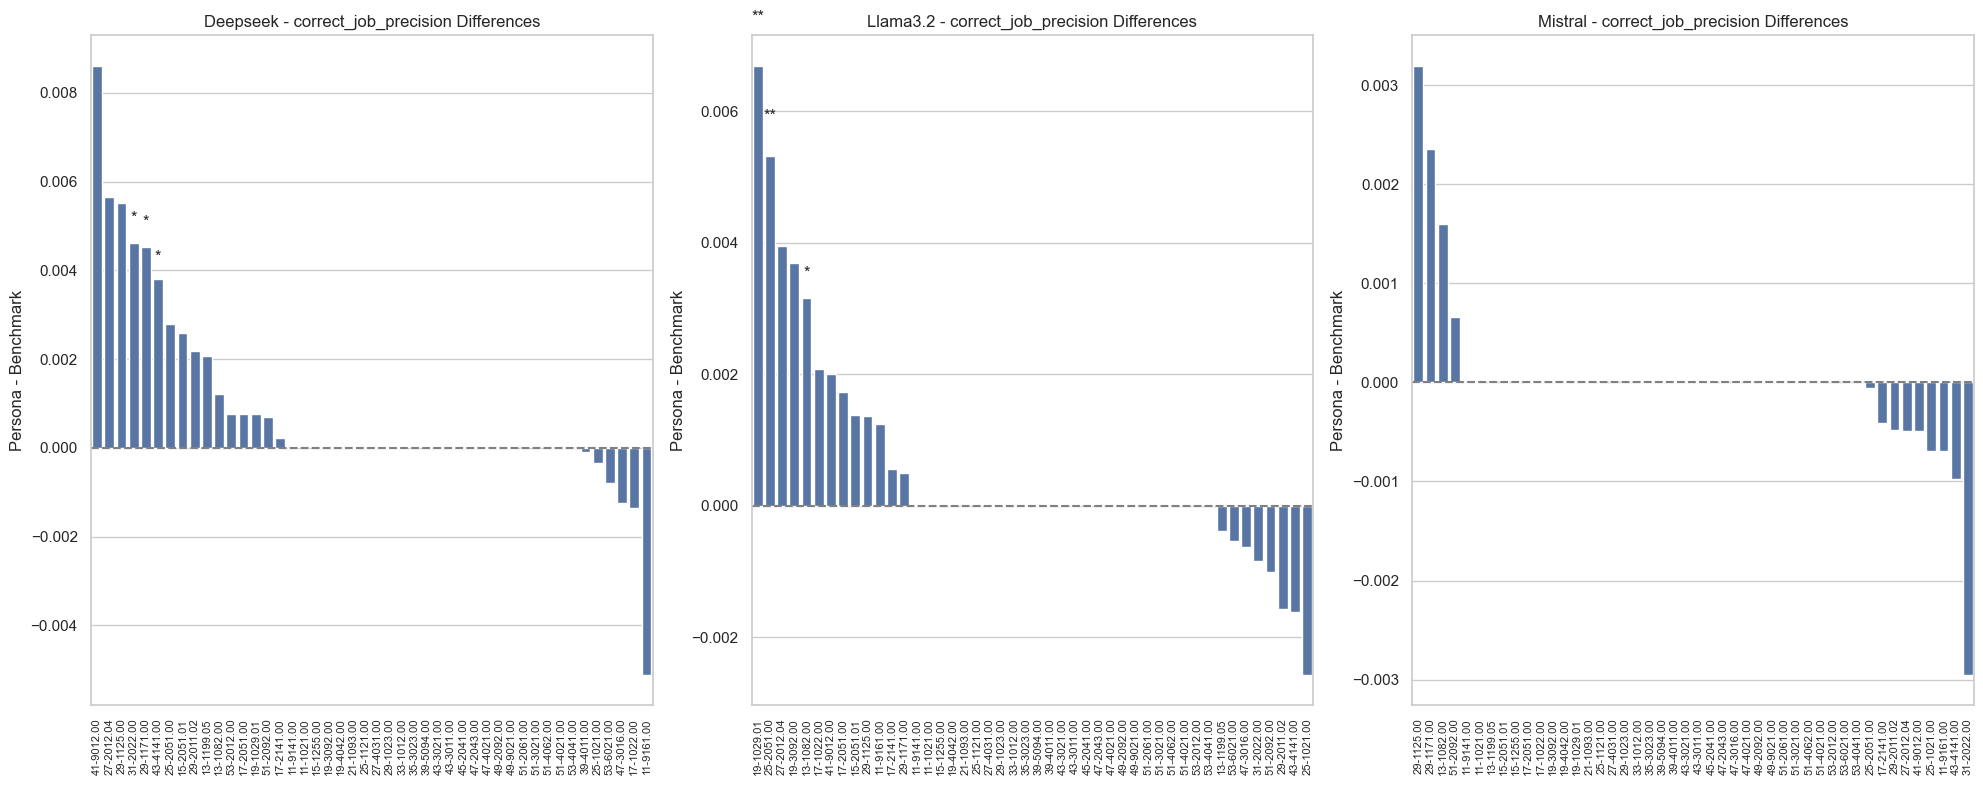

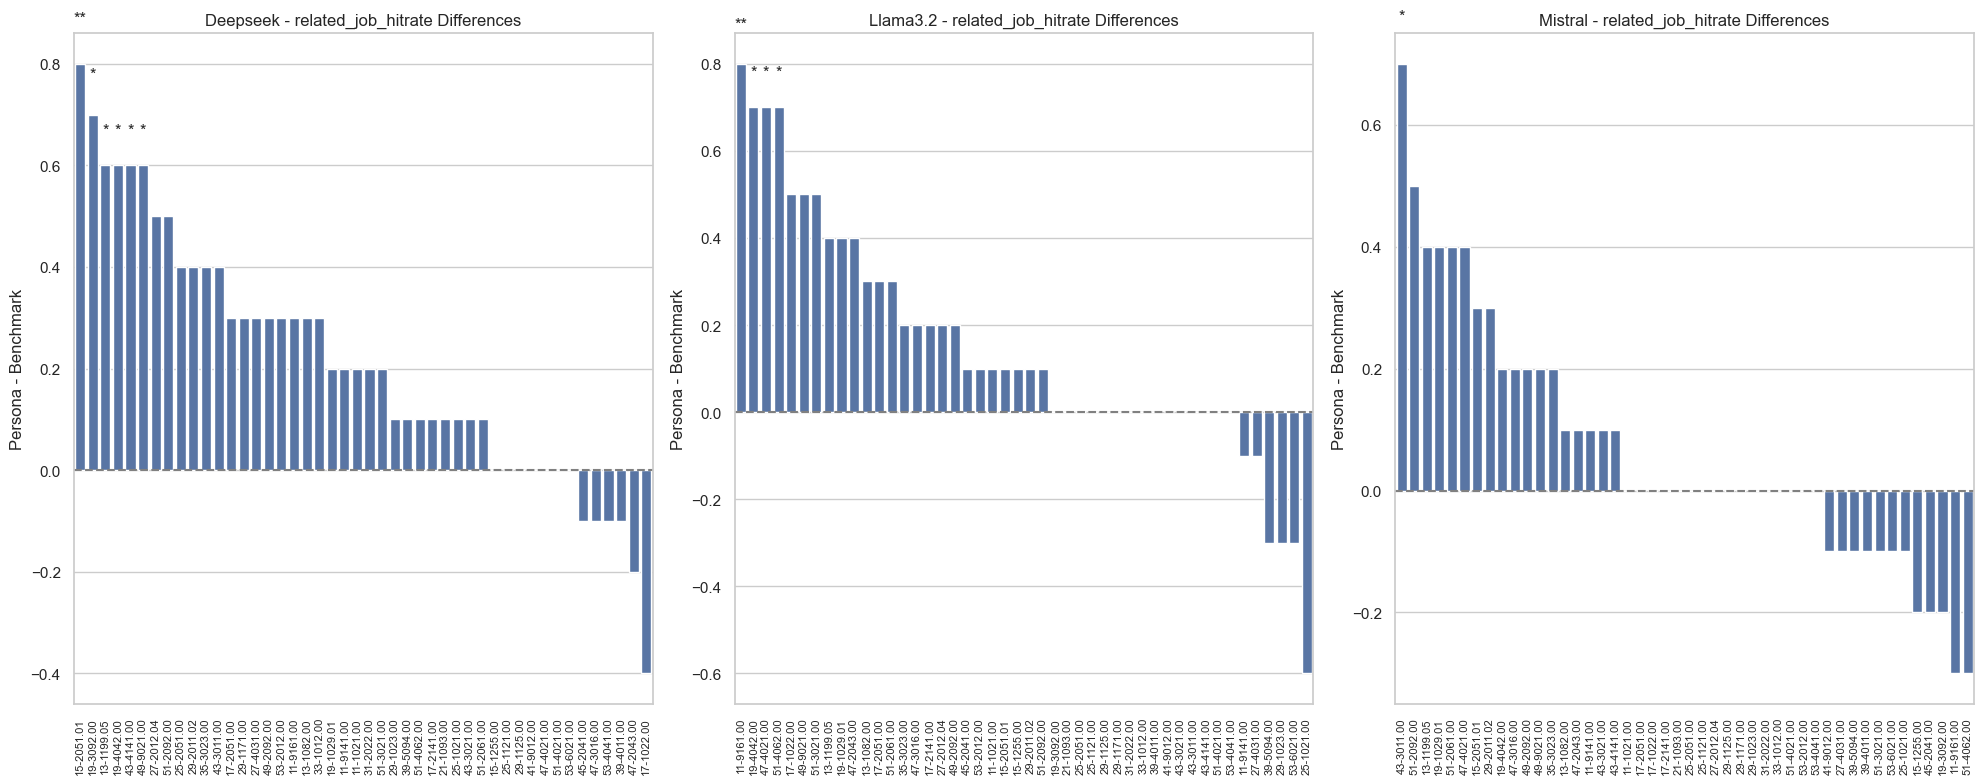

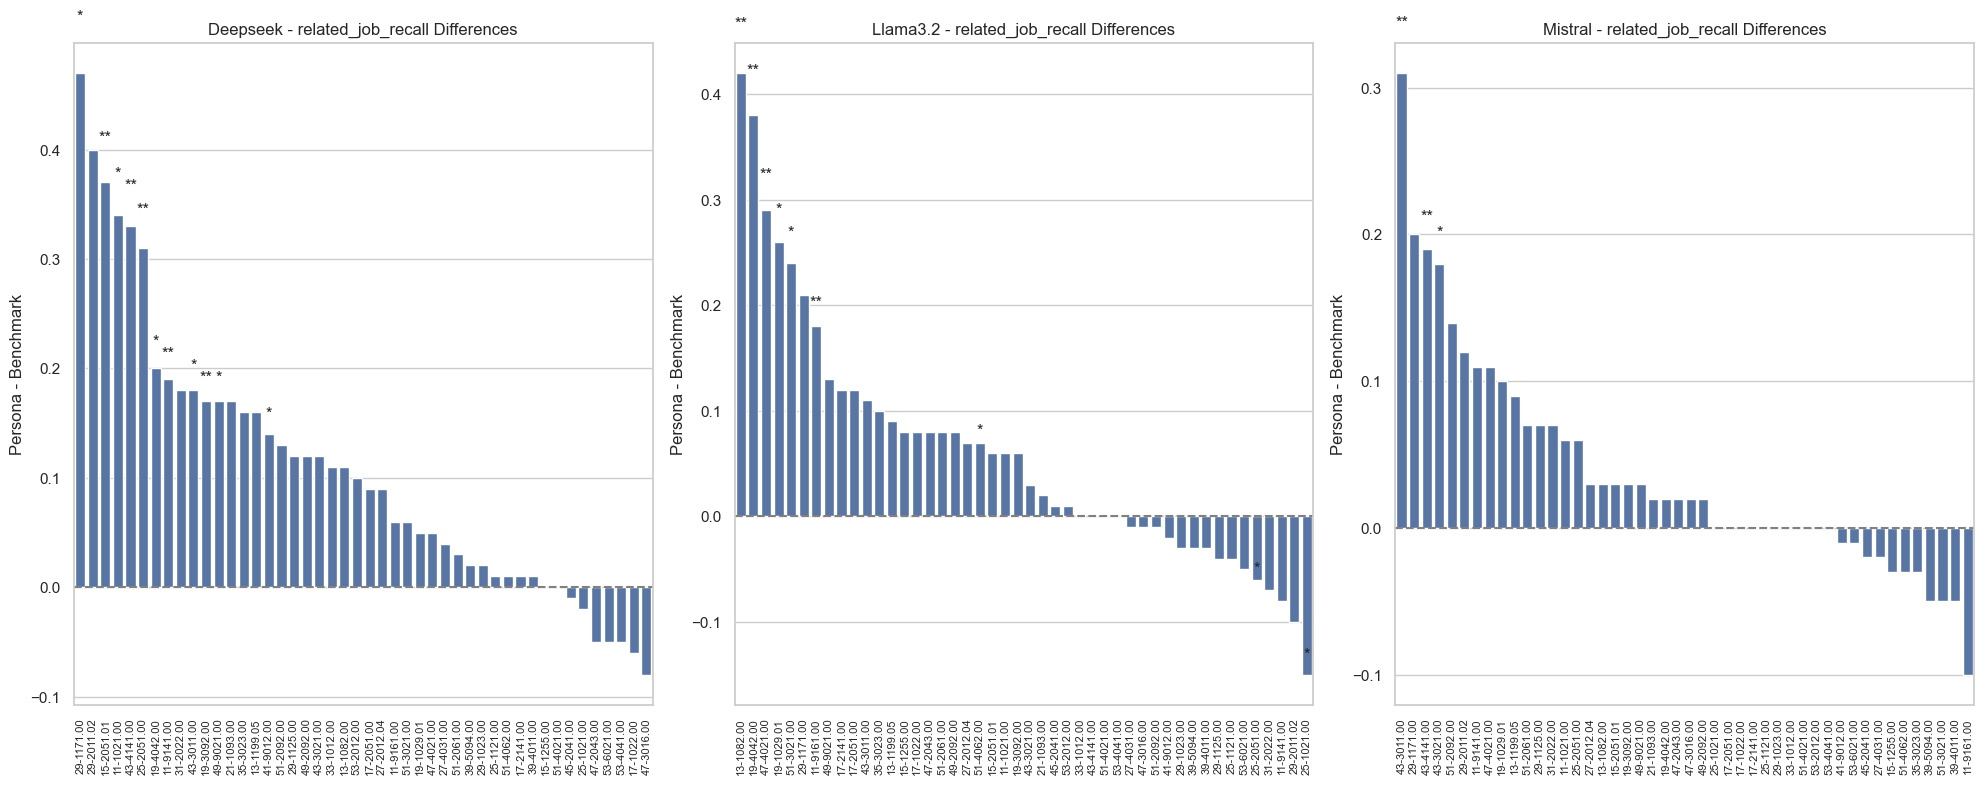

In [ ]:
# Job-level differences for all jobs
models = ["deepseek", "llama3.2", "mistral"]
metrics = metrics
df_raw = test
job_insights = {}
for model in models:
    job_insights[model] = {}
    df_model = df_raw[df_raw["model"] == model]
    for metric in metrics:
        job_insights[model][metric] = []
        for code in df_model["code"].unique():
            bench = df_model[(df_model["code"] == code) & (df_model["setup"] == "benchmark")][metric].to_numpy()
            persona = df_model[(df_model["code"] == code) & (df_model["setup"] == "persona")][metric].to_numpy()
            if len(bench) != 10 or len(persona) != 10:  # Check for missing trials
                print(f"Warning: Incomplete data for {model}, {metric}, {code}")
                continue
            if np.all(bench == persona):
                p = 1.0
            else:
                try:
                    stat, p = wilcoxon(bench, persona, alternative="two-sided")
                except ValueError as e:
                    print(f"Wilcoxon failed for {model}, {metric}, {code}: {e}")
                    p = 1.0
            mean_diff = persona.mean() - bench.mean()
            job_insights[model][metric].append((code, mean_diff, p))
        # Sort by difference
        job_insights[model][metric] = sorted(job_insights[model][metric], key=lambda x: x[1], reverse=True)


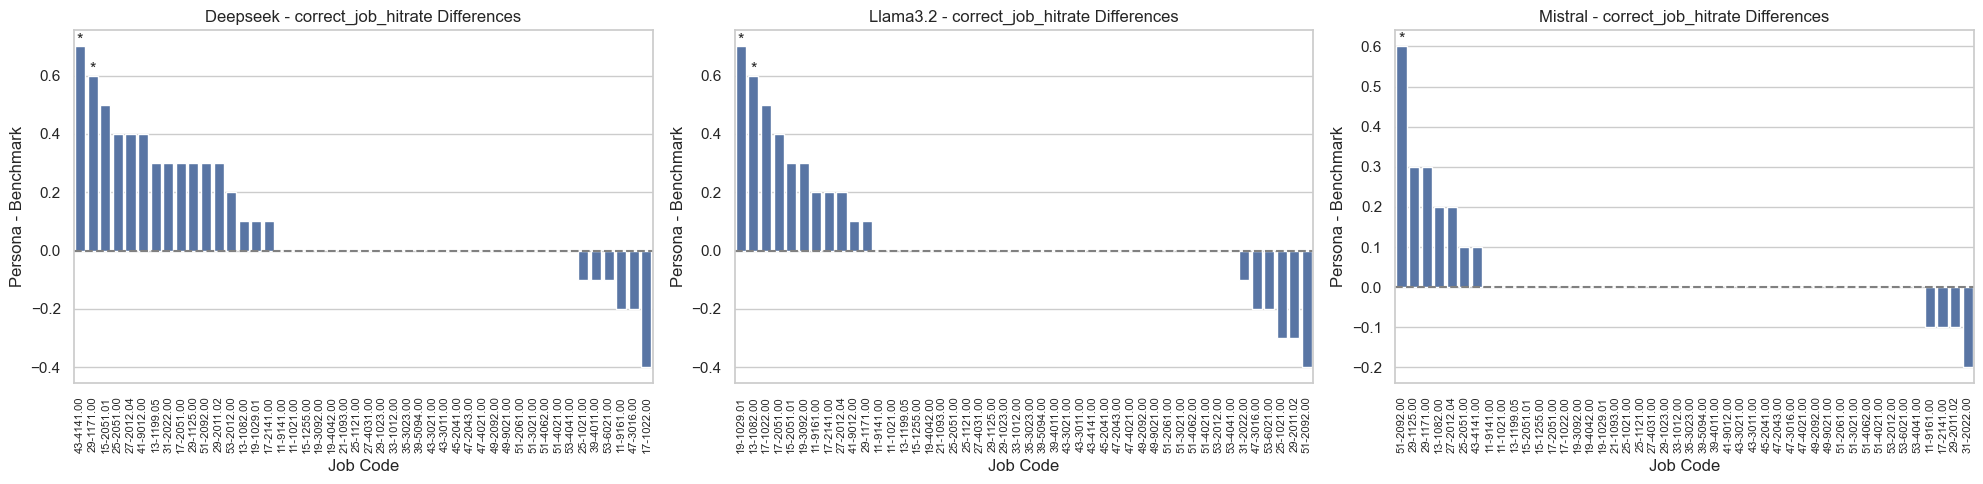

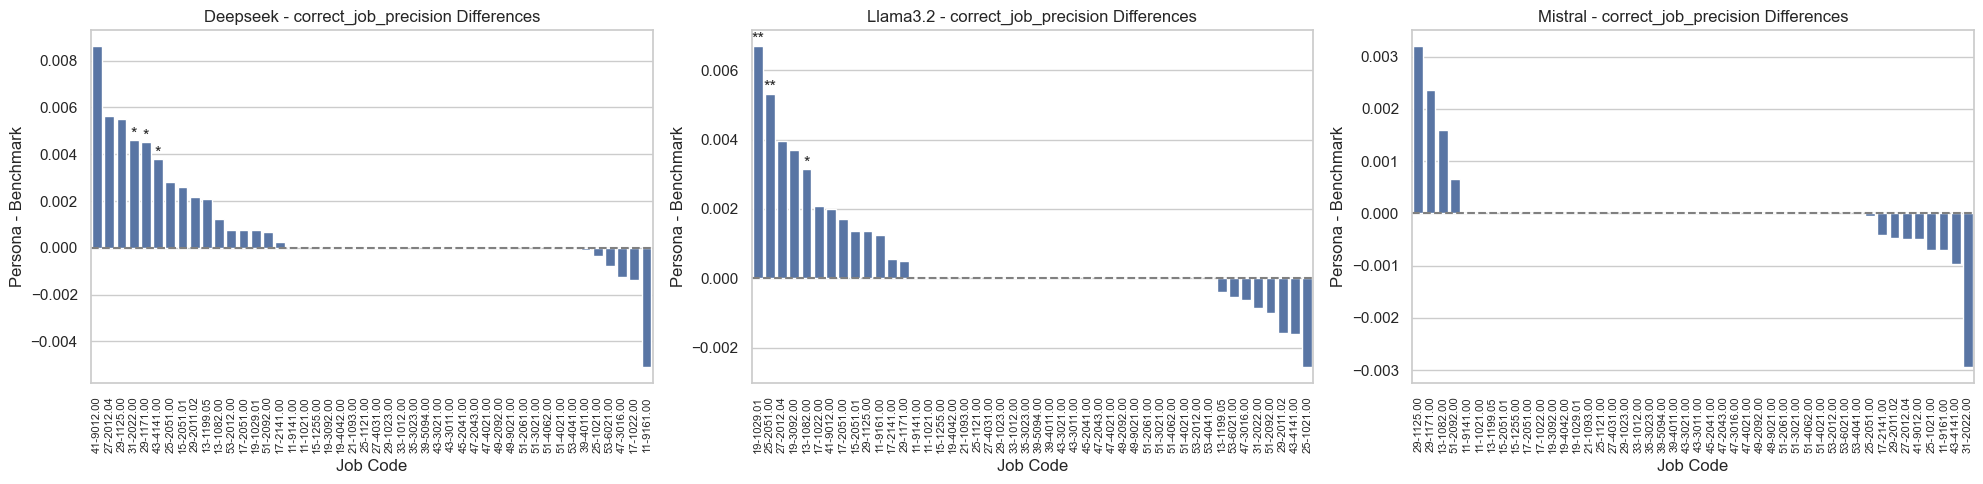

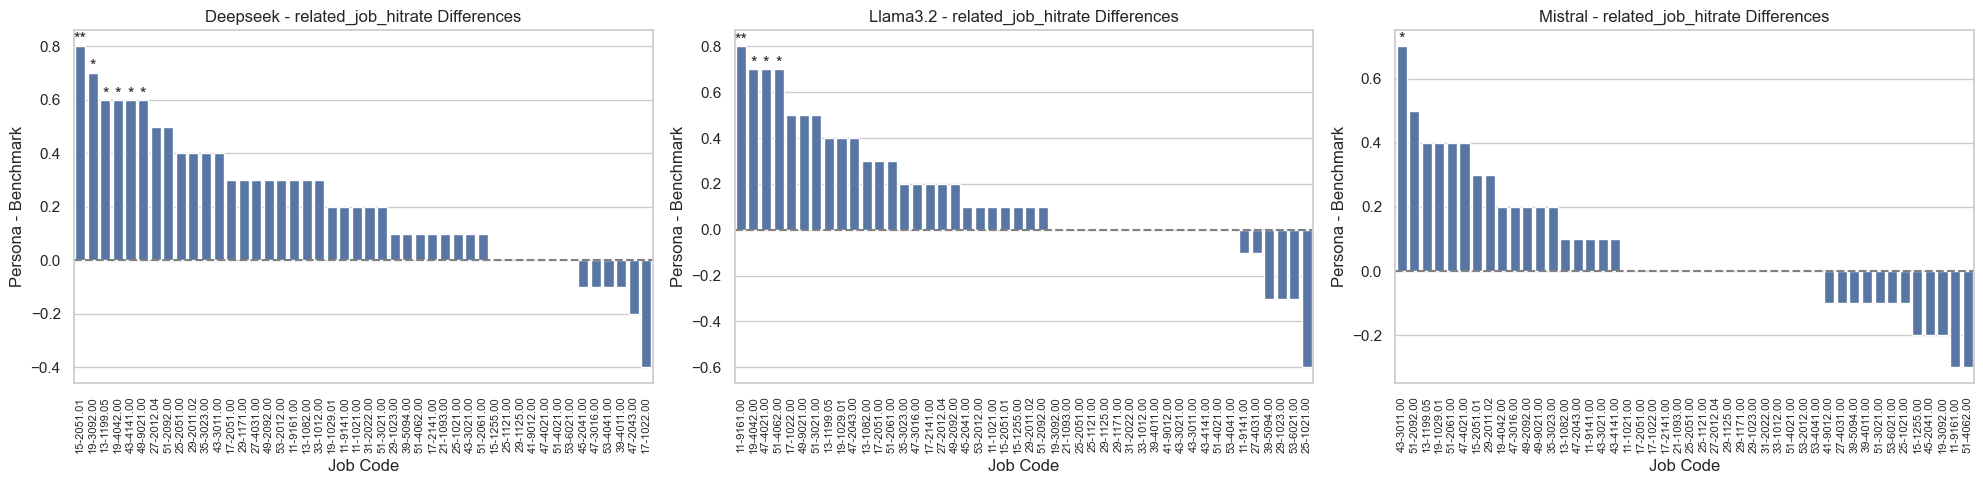

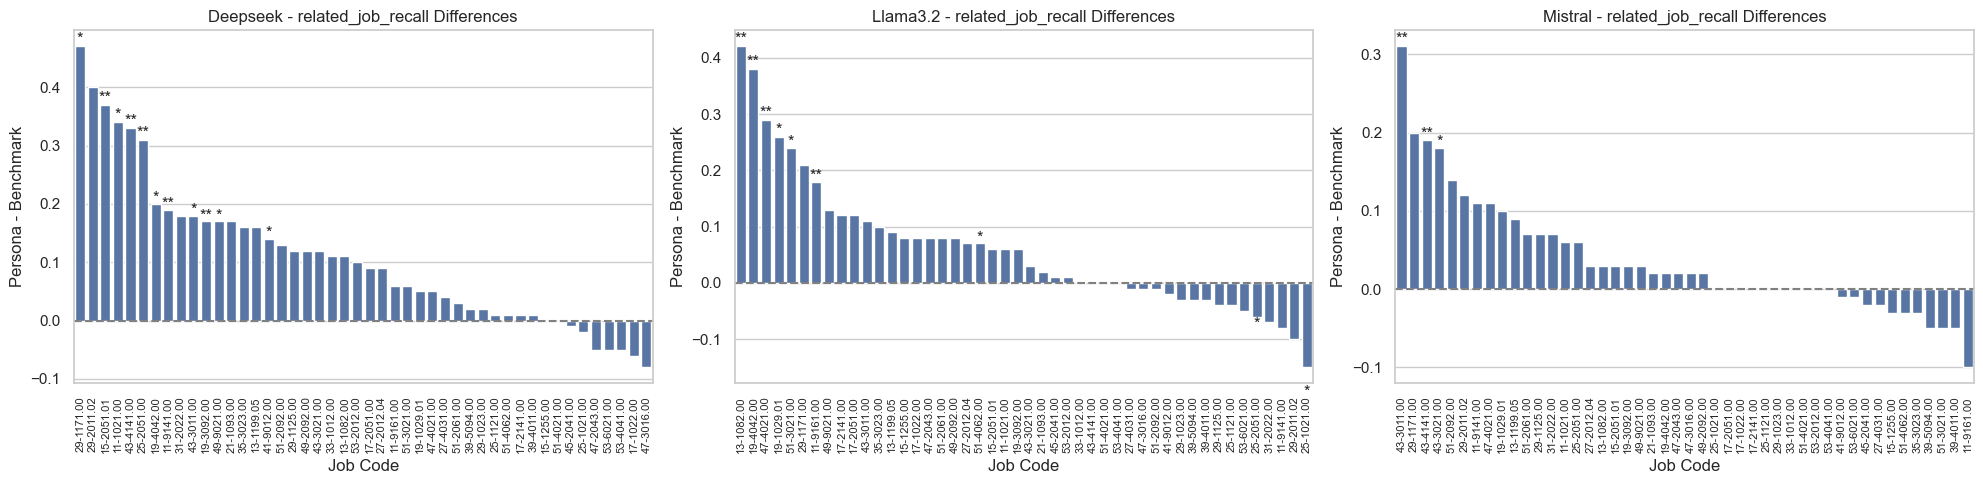

In [93]:
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(20, 5))  # Big enough for 46 jobs
    for i, model in enumerate(models, 1):
        plt.subplot(1, 3, i)
        if job_insights[model][metric]:  # Check if there are any jobs
            titles, diffs, p_vals = zip(*job_insights[model][metric])
            ax = sns.barplot(x=list(titles), y=list(diffs))  # Default color, no palette
            plt.axhline(0, color="gray", linestyle="--")
            plt.title(f"{model.capitalize()} - {metric} Differences")
            plt.xticks(rotation=90, ha="center", fontsize=8)
            plt.ylabel("Persona - Benchmark")
            plt.xlabel("Job Code")
            # Add significance stars
            for j, p in enumerate(p_vals):
                if p < 0.05:
                    ax.text(j, diffs[j] * 1.01 if diffs[j] >= 0 else diffs[j] * 1.35, 
                            "***" if p < 0.001 else "**" if p < 0.01 else "*", ha="center")
        else:
            plt.text(0.5, 0.5, "No Jobs Available", ha="center", va="center")
            plt.title(f"{model.capitalize()} - {metric} Differences")
    plt.tight_layout()
    plt.show()